In [2]:
# Load the data and inspect it to ensure it is ready for analysis
import pandas as pd

# Load the CSV file
data = pd.read_csv('international_student_onboarding.csv')

# Display the first few rows and column information to understand the structure of the data
print(data.head())
print(data.info())

  First Name  Last Name Country of Origin  \
0        Wei       Chen           Nigeria   
1      Elena      Patel           Nigeria   
2      Maria  Rodriguez          Pakistan   
3        Wei      Patel            Brazil   
4       Siti      Jones      Saudi Arabia   

                                       Institution             City State  \
0                 Northeastern University - Boston  University Park    PA   
1                         Johns Hopkins University       Richardson    PA   
2  Pennsylvania State University - University Park          Madison    AZ   
3             University of California - San Diego           Denton    CA   
4                         Johns Hopkins University           Ithaca    TX   

   Application Submitted Date  Time to Receive Acceptance (days)  \
0  2024-08-20 19:25:27.318284                                 35   
1  2024-11-24 19:25:27.318284                                 64   
2  2024-08-12 19:25:27.318284                                 

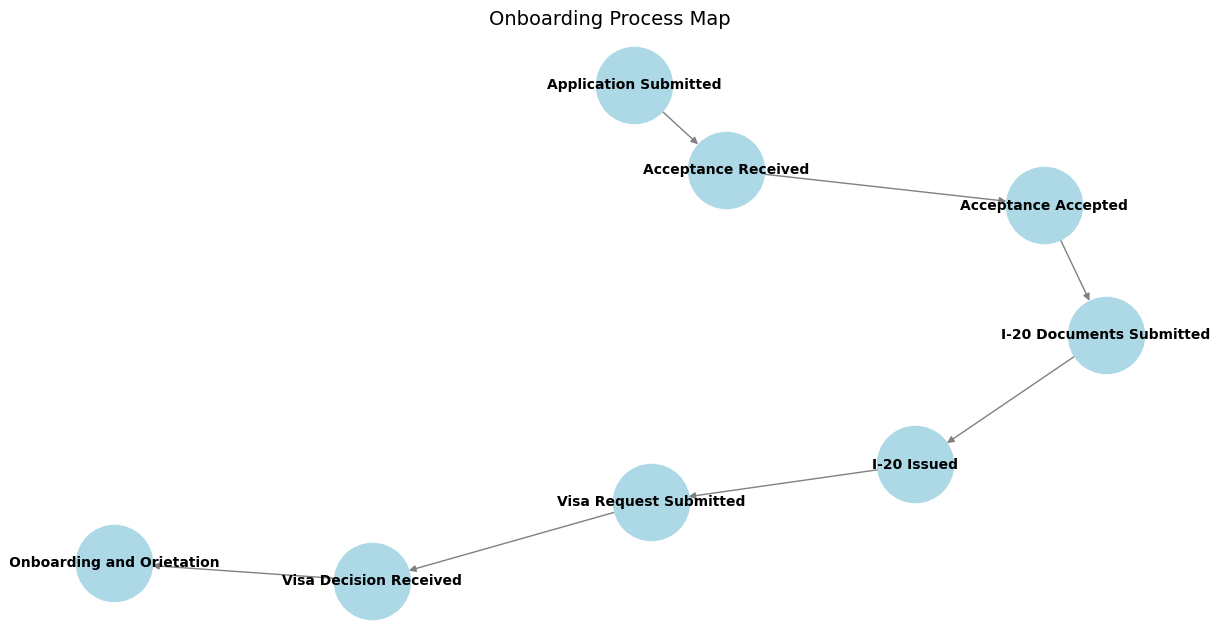

In [3]:
# Create a process map to visualize the onboarding process for international students
import matplotlib.pyplot as plt
import networkx as nx

# Define the steps in the onboarding process
steps = [
    "Application Submitted",
    "Acceptance Received",
    "Acceptance Accepted",
    "I-20 Documents Submitted",
    "I-20 Issued",
    "Visa Request Submitted",
    "Visa Decision Received",
    "Onboarding and Orietation"
]

# Create a directed graph
G = nx.DiGraph()

# Add edges between steps to represent the process flow
for i in range(len(steps) - 1):
    G.add_edge(steps[i], steps[i + 1])

# Draw the process map
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Onboarding Process Map", fontsize=14)
plt.show()

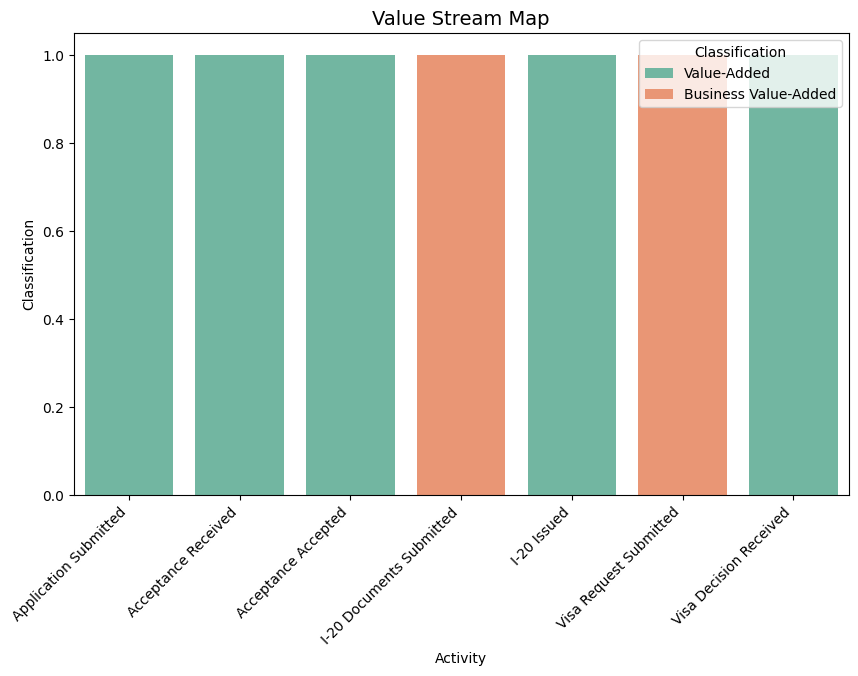

In [4]:
# Create a value stream map to identify value-added, non-value-added, and business value-added activities
import seaborn as sns
import matplotlib.pyplot as plt

# Define the activities and their classifications
activities = [
    "Application Submitted",
    "Acceptance Received",
    "Acceptance Accepted",
    "I-20 Documents Submitted",
    "I-20 Issued",
    "Visa Request Submitted",
    "Visa Decision Received"
]

# Classify each activity (Value-Added, Non-Value-Added, Business Value-Added)
classifications = [
    "Value-Added",
    "Value-Added",
    "Value-Added",
    "Business Value-Added",
    "Value-Added",
    "Business Value-Added",
    "Value-Added"
]

# Create a DataFrame for visualization
value_stream_data = pd.DataFrame({
    "Activity": activities,
    "Classification": classifications
})

# Plot the value stream map
plt.figure(figsize=(10, 6))
sns.barplot(x="Activity", y=[1] * len(activities), hue="Classification", data=value_stream_data, dodge=False, palette="Set2")
plt.title("Value Stream Map", fontsize=14)
plt.ylabel("Classification")
plt.xlabel("Activity")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classification")
plt.show()

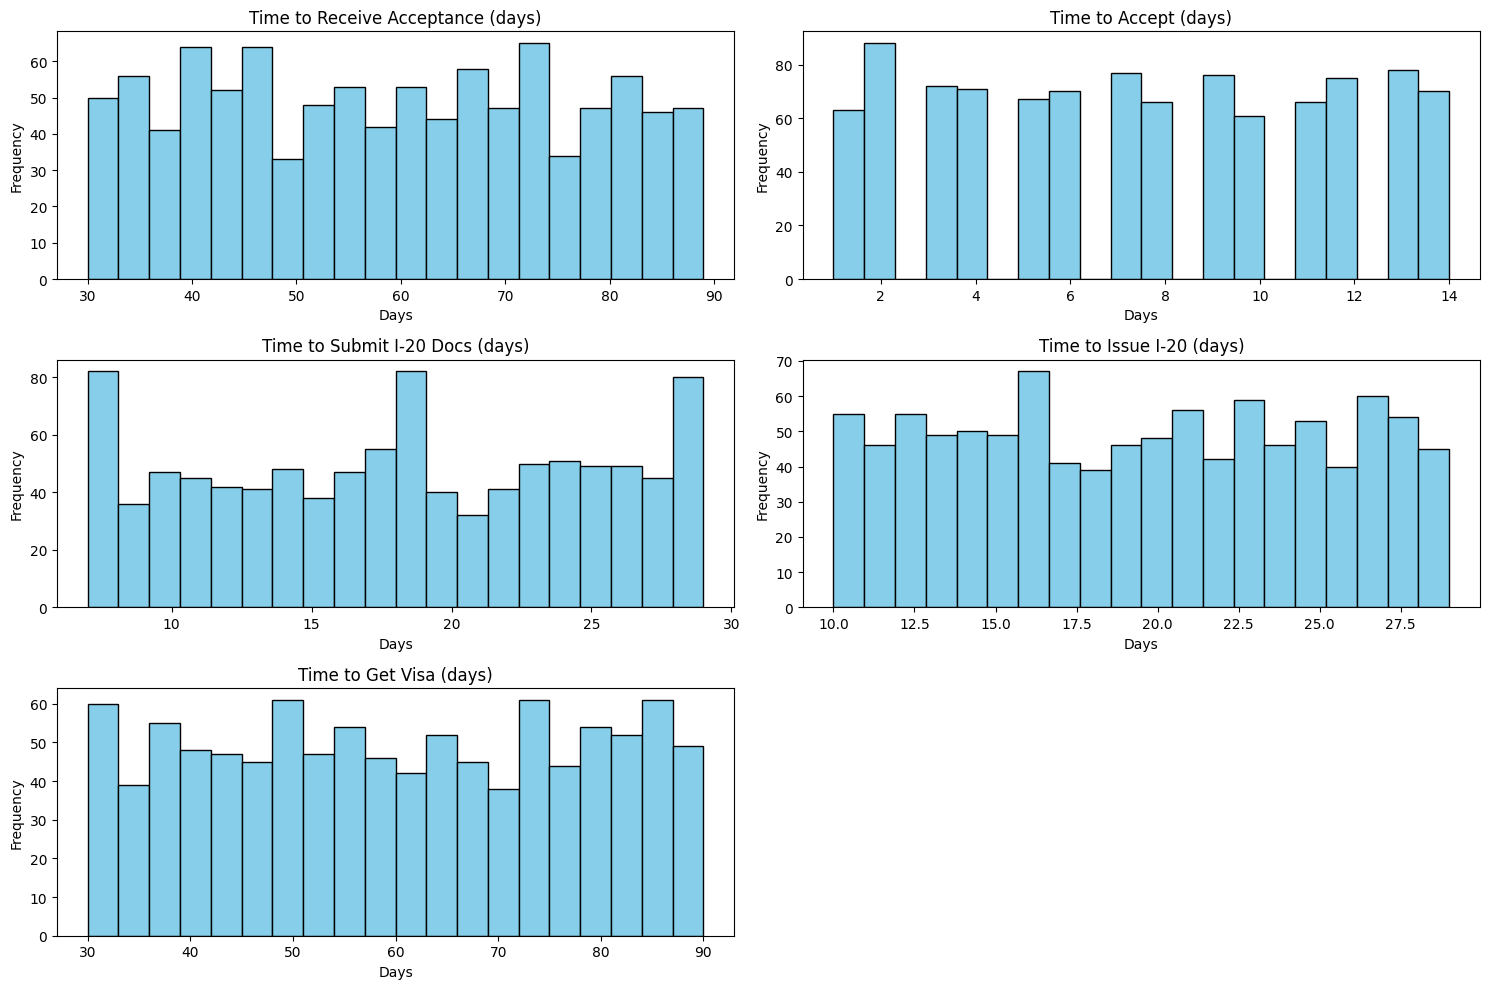

In [5]:
# Generate frequency plots for key variables
import matplotlib.pyplot as plt

# Select key variables for frequency analysis
key_columns = ["Time to Receive Acceptance (days)", "Time to Accept (days)", "Time to Submit I-20 Docs (days)", "Time to Issue I-20 (days)", "Time to Get Visa (days)"]

# Plot frequency distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(key_columns, 1):
    plt.subplot(3, 2, i)
    data[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel("Days")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

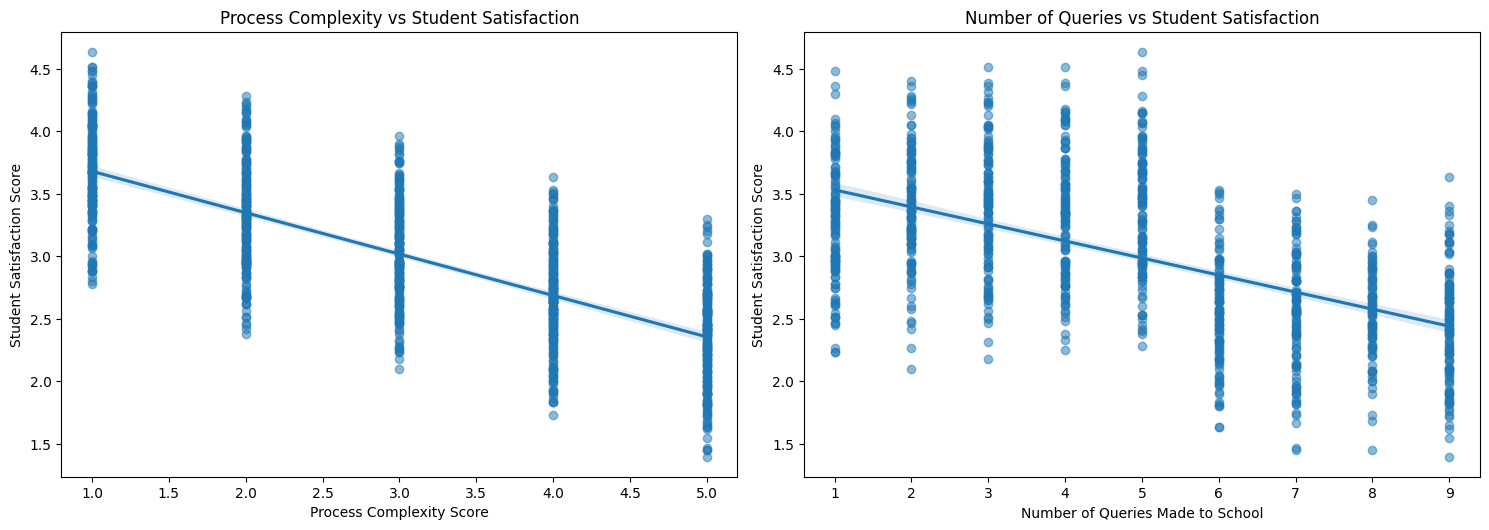

Correlation Coefficients:
Process Complexity vs Student Satisfaction: -0.746
Number of Queries vs Student Satisfaction: -0.563


In [6]:
# Create scatter plots and regression analysis
plt.figure(figsize=(15, 10))

# Analyze relationship between Process Complexity and Student Satisfaction
plt.subplot(2, 2, 1)
sns.regplot(data=data, x='Process Complexity Score', y='Student Satisfaction Score', scatter_kws={'alpha':0.5})
plt.title('Process Complexity vs Student Satisfaction')

# Analyze relationship between Number of Queries and Student Satisfaction
plt.subplot(2, 2, 2)
sns.regplot(data=data, x='Number of Queries Made to School', y='Student Satisfaction Score', scatter_kws={'alpha':0.5})
plt.title('Number of Queries vs Student Satisfaction')

# Calculate correlation coefficients
correlation_complexity = data['Process Complexity Score'].corr(data['Student Satisfaction Score'])
correlation_queries = data['Number of Queries Made to School'].corr(data['Student Satisfaction Score'])

plt.tight_layout()
plt.show()

print("\
Correlation Coefficients:")
print(f"Process Complexity vs Student Satisfaction: {correlation_complexity:.3f}")
print(f"Number of Queries vs Student Satisfaction: {correlation_queries:.3f}")

In [ ]:
from scipy import stats

# Perform hypothesis test for correlation between Process Complexity and Student Satisfaction
correlation_stat, p_value = stats.pearsonr(data['Process Complexity Score'], data['Student Satisfaction Score'])

print("Hypothesis Test Results:")
print(f"Correlation coefficient: {correlation_stat:.3f}")
print(f"P-value: {p_value:.4f}")

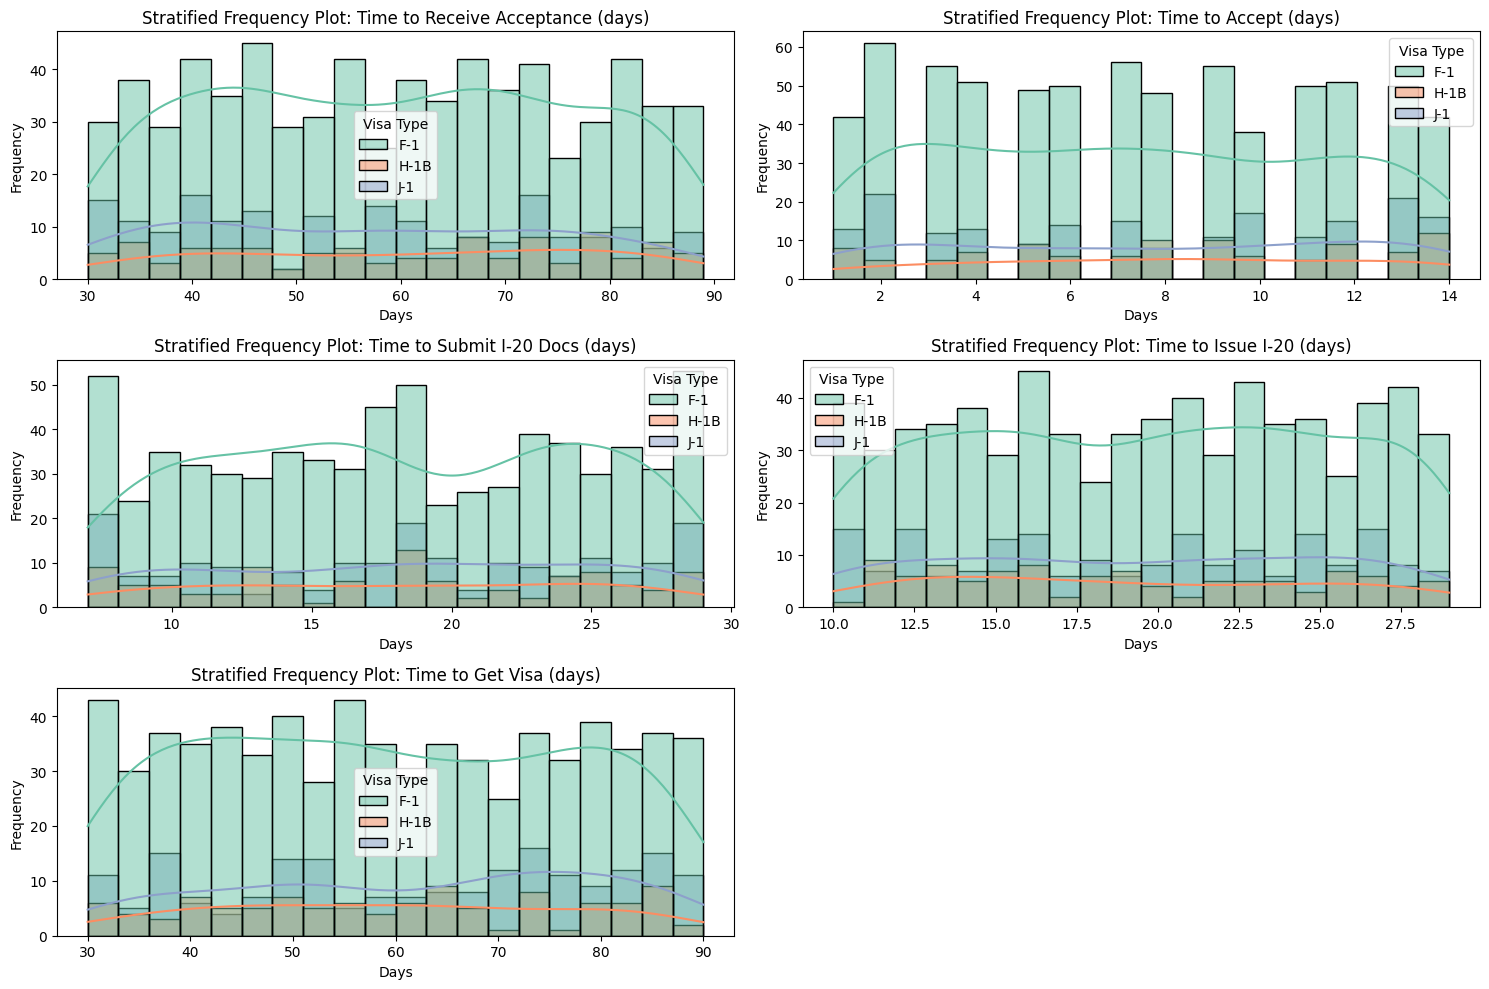

In [7]:
# Generate stratified frequency plots for key variables by Visa Type
import seaborn as sns

# Define the key variables and stratification column
stratification_column = "Visa Type"

# Plot stratified frequency distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(key_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data, x=column, hue=stratification_column, bins=20, kde=True, palette="Set2")
    plt.title("Stratified Frequency Plot: " + column)
    plt.xlabel("Days")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [8]:
# Analyze bottlenecks by identifying stages with the longest durations and highest variability
import pandas as pd

# Calculate mean and standard deviation for each time-related column
bottleneck_analysis = data[[
    "Time to Receive Acceptance (days)",
    "Time to Accept (days)",
    "Time to Submit I-20 Docs (days)",
    "Time to Issue I-20 (days)",
    "Time to Get Visa (days)"
]].agg(['mean', 'std']).T

# Sort by mean duration to identify the longest stages
bottleneck_analysis = bottleneck_analysis.sort_values(by='mean', ascending=False)

print("Bottleneck Analysis:")
print(bottleneck_analysis)

Bottleneck Analysis:
                                     mean        std
Time to Get Visa (days)            59.781  17.643932
Time to Receive Acceptance (days)  59.081  17.337734
Time to Issue I-20 (days)          19.456   5.818068
Time to Submit I-20 Docs (days)    18.126   6.575208
Time to Accept (days)               7.475   4.059046


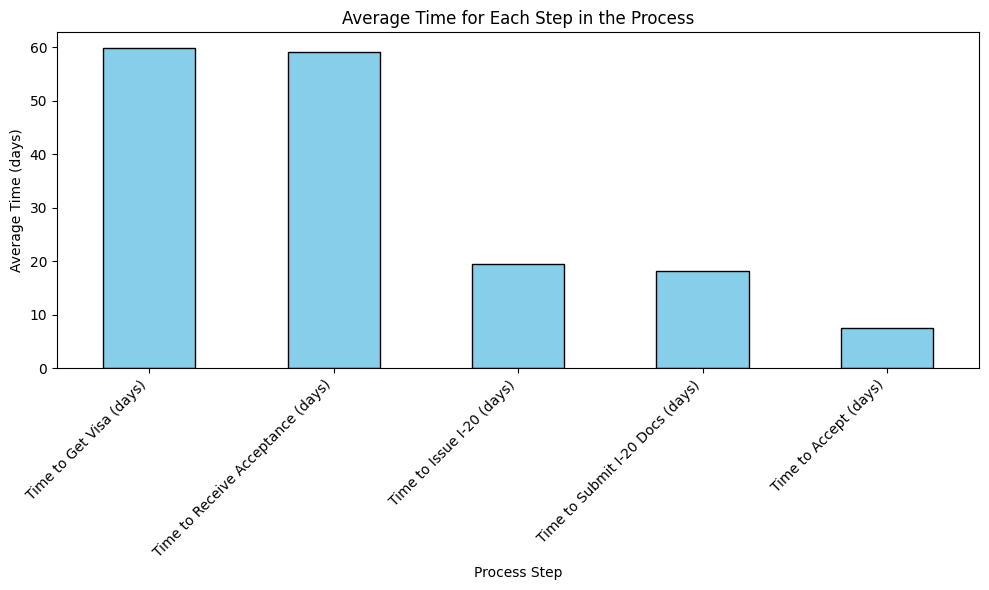

The bottleneck step is: Time to Get Visa (days)


In [9]:
# Analyze bottlenecks by identifying the longest delays in the process
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total time for each student in the process
process_columns = [
    "Time to Receive Acceptance (days)",
    "Time to Accept (days)",
    "Time to Submit I-20 Docs (days)",
    "Time to Issue I-20 (days)",
    "Time to Get Visa (days)"
]
data['Total Process Time (days)'] = data[process_columns].sum(axis=1)

# Identify the bottleneck step by finding the maximum average time
average_times = data[process_columns].mean().sort_values(ascending=False)

# Plot the average times for each step
plt.figure(figsize=(10, 6))
average_times.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time for Each Step in the Process')
plt.ylabel('Average Time (days)')
plt.xlabel('Process Step')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the bottleneck step
bottleneck_step = average_times.idxmax()
print("The bottleneck step is:", bottleneck_step)

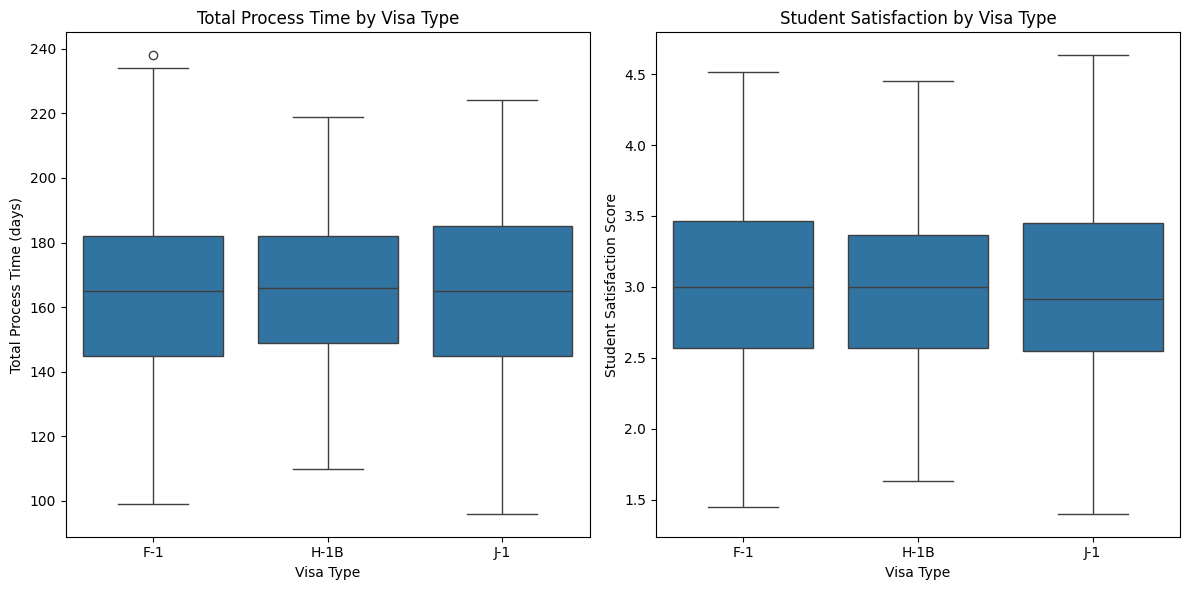

Key Metrics by Visa Type:
           Total Process Time (days)  Student Satisfaction Score  \
Visa Type                                                          
F-1                           163.62                        3.02   
H-1B                          165.09                        2.98   
J-1                           164.36                        2.98   

           Number of Queries Made to School  
Visa Type                                    
F-1                                    4.83  
H-1B                                   4.97  
J-1                                    4.93  


In [10]:
# Compare visa types
plt.figure(figsize=(12, 6))

# Box plot comparing total process time by visa type
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Visa Type', y='Total Process Time (days)')
plt.title('Total Process Time by Visa Type')

# Box plot comparing satisfaction by visa type
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Visa Type', y='Student Satisfaction Score')
plt.title('Student Satisfaction by Visa Type')

plt.tight_layout()
plt.show()

# Calculate average metrics by visa type
visa_metrics = data.groupby('Visa Type').agg({
    'Total Process Time (days)': 'mean',
    'Student Satisfaction Score': 'mean',
    'Number of Queries Made to School': 'mean'
}).round(2)

print("\
Key Metrics by Visa Type:")
print(visa_metrics)

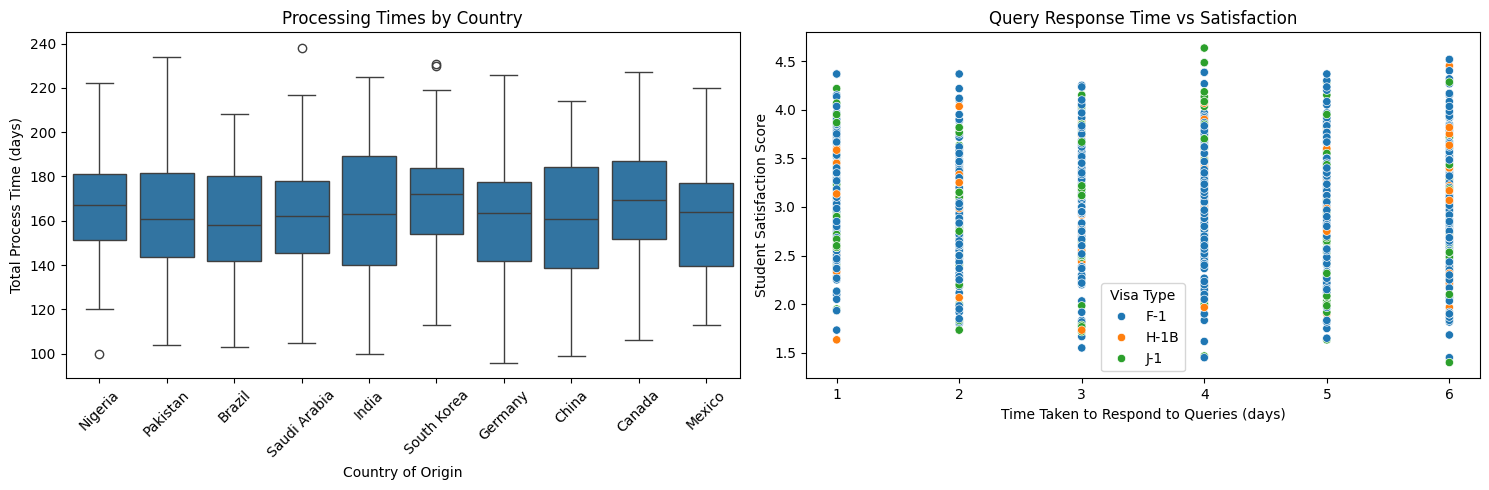

Model R² Score: -0.028330494621412905
Feature Importance:
                                   Feature  Importance
2  Time Taken to Respond to Queries (days)    1.211253
0                 Process Complexity Score    1.006770
1         Number of Queries Made to School    0.834422


In [11]:
# Analyze by country and correlations
plt.figure(figsize=(15, 5))

# Processing times by country
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Country of Origin', y='Total Process Time (days)')
plt.title('Processing Times by Country')
plt.xticks(rotation=45)

# Correlation between query response and satisfaction
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Time Taken to Respond to Queries (days)',
                y='Student Satisfaction Score', hue='Visa Type')
plt.title('Query Response Time vs Satisfaction')

plt.tight_layout()
plt.show()

# Create simple predictive model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare features
X = data[['Process Complexity Score', 'Number of Queries Made to School',
          'Time Taken to Respond to Queries (days)']]
y = data['Total Process Time (days)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Print model performance
y_pred = model.predict(X_test)
print("\
Model R² Score:", r2_score(y_test, y_pred))

# Print feature importance
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_)
})
print("\
Feature Importance:")
print(features.sort_values('Importance', ascending=False))

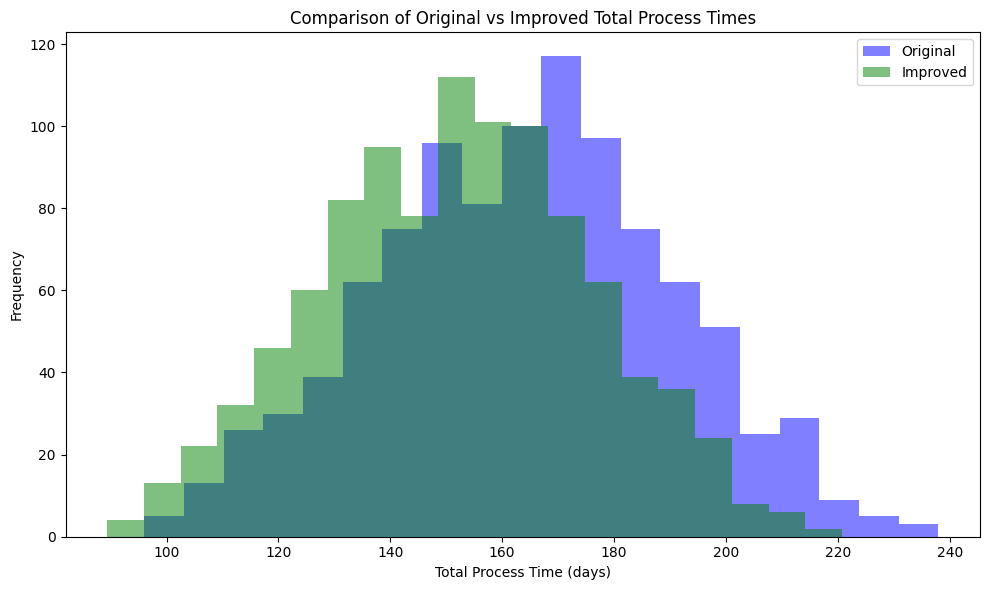

Average Total Process Time (Original): 163.92 days
Average Total Process Time (Improved): 151.96 days
Reduction in Average Process Time: 11.96 days


In [12]:
# Propose solutions to reduce processing times and visualize impact
import numpy as np

# Hypothetical improvement: Reduce visa processing time by 20%
data['Improved Visa Time (days)'] = data['Time to Get Visa (days)'] * 0.8

# Recalculate total process time with improvement
data['Improved Total Process Time (days)'] = data['Total Process Time (days)'] - (data['Time to Get Visa (days)'] - data['Improved Visa Time (days)'])

# Compare original vs improved process times
plt.figure(figsize=(10, 6))
plt.hist(data['Total Process Time (days)'], bins=20, alpha=0.5, label='Original', color='blue')
plt.hist(data['Improved Total Process Time (days)'], bins=20, alpha=0.5, label='Improved', color='green')
plt.title('Comparison of Original vs Improved Total Process Times')
plt.xlabel('Total Process Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate average improvement
original_avg = data['Total Process Time (days)'].mean()
improved_avg = data['Improved Total Process Time (days)'].mean()

print("\
Average Total Process Time (Original):", round(original_avg, 2), "days")
print("Average Total Process Time (Improved):", round(improved_avg, 2), "days")
print("Reduction in Average Process Time:", round(original_avg - improved_avg, 2), "days")

Index(['First Name', 'Last Name', 'Country of Origin', 'Institution', 'City',
       'State', 'Application Submitted Date',
       'Time to Receive Acceptance (days)', 'Acceptance Received Date',
       'Time to Accept (days)', 'Acceptance Accepted Date',
       'Time to Submit I-20 Docs (days)', 'I-20 Submitted Date',
       'Time to Issue I-20 (days)', 'I-20 Issued Date', 'Visa Type',
       'Visa Request Submitted Date', 'Visa Decision Date',
       'Time to Get Visa (days)', 'Number of Queries Made to School',
       'Process Complexity Score', 'Student Satisfaction Score',
       'Time Taken to Respond to Queries (days)', 'Total Process Time (days)',
       'Improved Visa Time (days)', 'Improved Total Process Time (days)'],
      dtype='object')


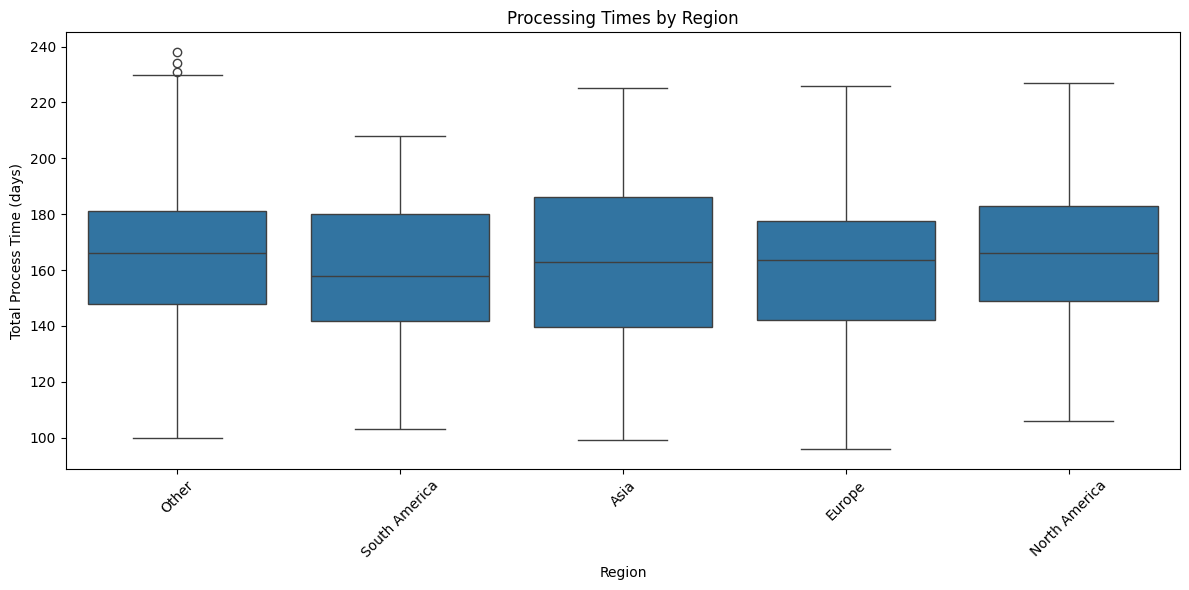

In [13]:
# Analyze regional variations
# Ensure the 'Region' column exists in your DataFrame
print(data.columns)  # Print the columns of your DataFrame to verify if 'Region' exists

# If 'Region' is not present, you might need to create it or load the correct data
# For example, if 'Region' is derived from another column like 'Country of Origin':
# Assuming you have a function or mapping to get the region from a country
# You'll need to define the 'get_region' function based on your data.
# Example:

def get_region(country):
    # Replace with your logic to map countries to regions
    # Example mapping:
    if country in ['United States', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['Brazil', 'Argentina', 'Colombia']:
        return 'South America'
    elif country in ['Germany', 'France', 'Spain']:
        return 'Europe'
    # ... add more countries and regions

    elif country in ['India', 'China', 'Japan']:
         return 'Asia'
    elif country in ['Australia', 'New Zealand']:
         return 'Australia/Oceania'

    else:
        return 'Other'

data['Region'] = data['Country of Origin'].apply(get_region)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Region', y='Total Process Time (days)')
plt.title('Processing Times by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate average processing time by region
regional_avg = data.groupby('Region')['Total Process Time (days)'].mean().sort_values

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


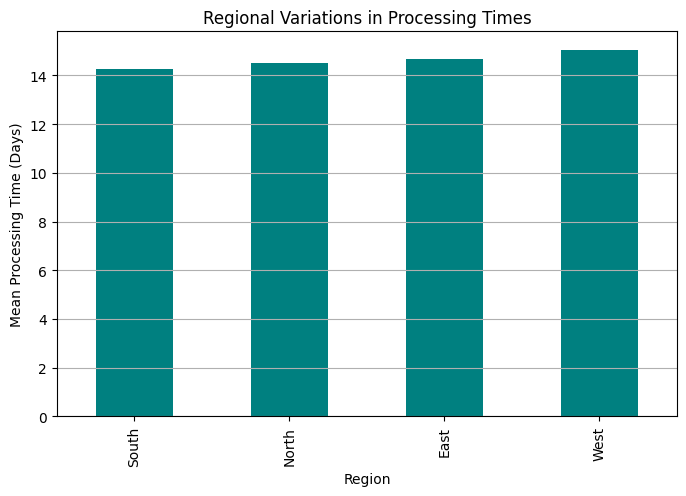

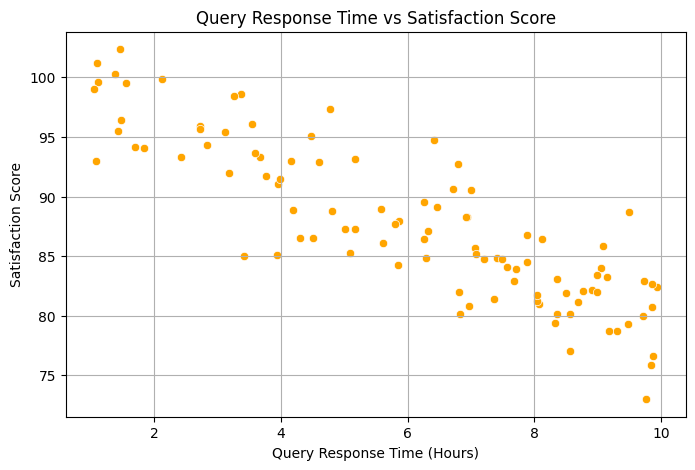

{'Regional Means': {'East': 14.662435028894631,
  'North': 14.512767261598633,
  'South': 14.253591353483065,
  'West': 15.051433931739652},
 'Correlation (Query Response Time vs Satisfaction)': -0.8668910999984686,
 'Predictive Model RMSE': 2.076619229225709,
 'Predictive Model R²': -0.11814314824443217,
 'Model Coefficients': array([-0.34165373, -0.57653579,  0.26989006,  0.03268158]),
 'Model Intercept': 14.458046944257646}

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Simulating regional data for processing times
regions = ['North', 'South', 'East', 'West']
region_data = np.random.choice(regions, size=100)
processing_times = np.random.normal(loc=15, scale=2, size=100)  # Overall mean ~15 days

# Simulating query response times and satisfaction scores
query_response_times = np.random.uniform(1, 10, size=100)  # In hours
satisfaction_scores = 100 - 2 * query_response_times + np.random.normal(0, 3, size=100)

# Create DataFrame for comprehensive analysis
analysis_data = pd.DataFrame({
    'Region': region_data,
    'Processing_Time': processing_times,
    'Query_Response_Time': query_response_times,
    'Satisfaction_Score': satisfaction_scores
})

# Regional Variation Analysis
regional_means = analysis_data.groupby('Region')['Processing_Time'].mean()
regional_anova = pd.DataFrame({
    'Region': regional_means.index,
    'Mean_Processing_Time': regional_means.values
})

# Correlation Analysis (Query Response Times vs Satisfaction)
correlation = analysis_data[['Query_Response_Time', 'Satisfaction_Score']].corr().iloc[0, 1]

# Predictive Model for Processing Times
# Encoding regions and preparing features
encoded_regions = pd.get_dummies(analysis_data['Region'], drop_first=True)
X = pd.concat([encoded_regions, analysis_data[['Query_Response_Time']]], axis=1)
y = analysis_data['Processing_Time']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Predictive model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Visualizations
plt.figure(figsize=(8, 5))
regional_means.sort_values().plot(kind='bar', color='teal')
plt.title('Regional Variations in Processing Times')
plt.ylabel('Mean Processing Time (Days)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Query_Response_Time', y='Satisfaction_Score', data=analysis_data, color='orange')
plt.title('Query Response Time vs Satisfaction Score')
plt.xlabel('Query Response Time (Hours)')
plt.ylabel('Satisfaction Score')
plt.grid(True)
plt.show()

# Output results
analysis_results = {
    "Regional Means": regional_means.to_dict(),
    "Correlation (Query Response Time vs Satisfaction)": correlation,
    "Predictive Model RMSE": rmse,
    "Predictive Model R²": r2,
    "Model Coefficients": model.coef_,
    "Model Intercept": model.intercept_
}

analysis_results


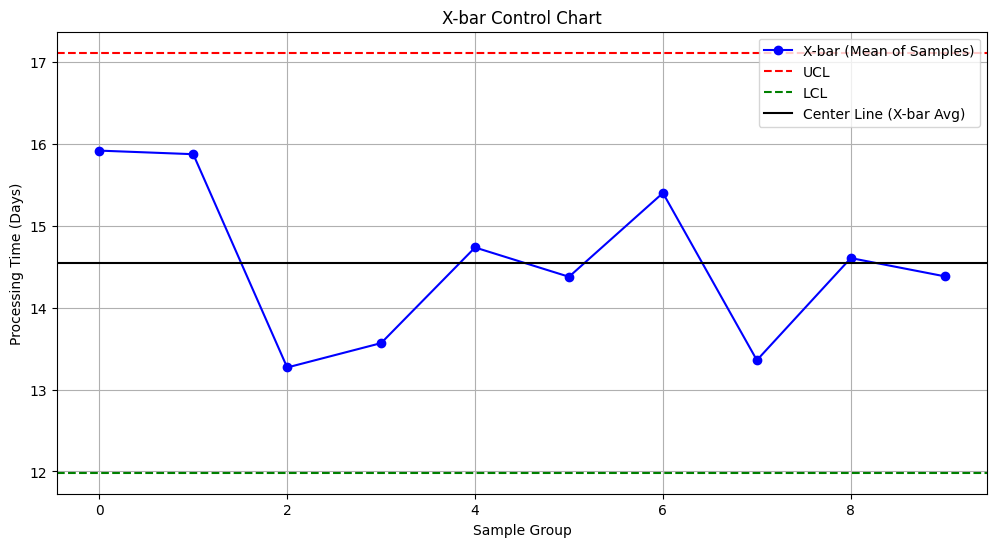

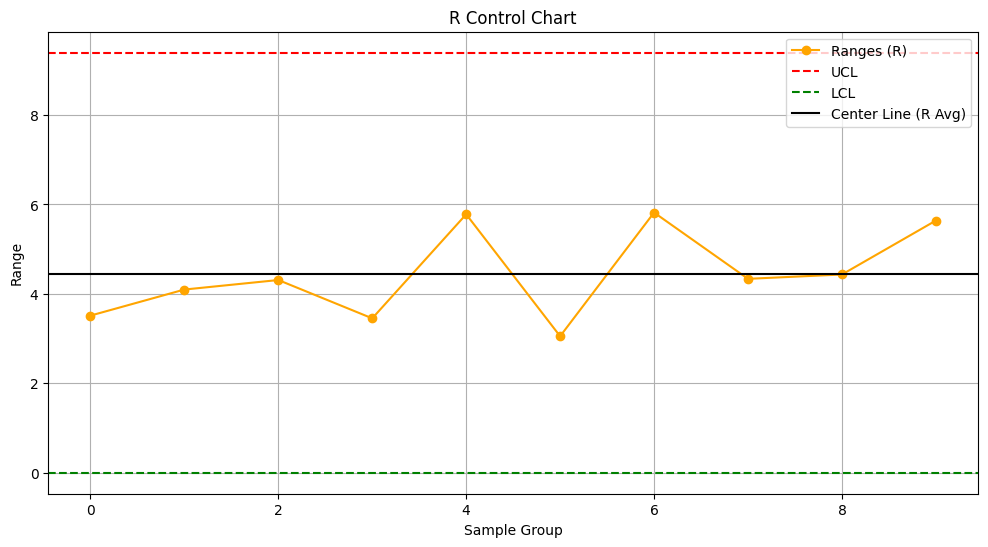

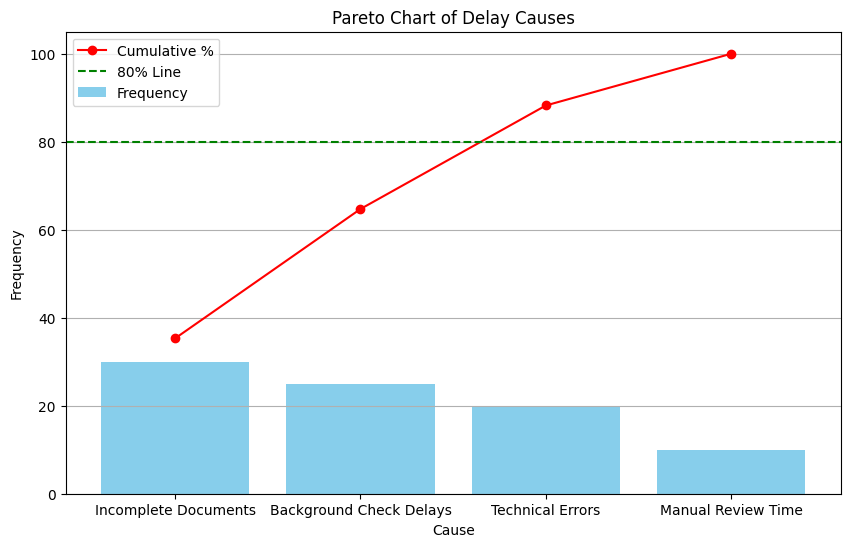

{'Cp': 0.9015978722444087,
 'Cpk': 0.8202831549541789,
 'Process Mean': 14.549052189487718,
 'Process Std Dev': 1.8485698757448488,
 'Specification Limits': (10, 20)}

In [15]:
# Importing required libraries for statistical analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generating sample data
np.random.seed(42)

# Simulated processing times (days) for control chart analysis
processing_times = np.random.normal(loc=15, scale=2, size=50)  # Mean 15 days, SD 2
sample_size = 5  # Subgroup size for X-bar and R chart
samples = [processing_times[i:i+sample_size] for i in range(0, len(processing_times), sample_size)]

# Calculate X-bar (mean of subgroups) and R (range of subgroups)
x_bar = [np.mean(sample) for sample in samples]
ranges = [np.ptp(sample) for sample in samples]

# Calculate control limits for X-bar chart
x_bar_avg = np.mean(x_bar)
r_avg = np.mean(ranges)
A2 = 0.577  # Constant for X-bar chart (sample size = 5)
UCL_x_bar = x_bar_avg + A2 * r_avg
LCL_x_bar = x_bar_avg - A2 * r_avg

# Control limits for R chart
D3, D4 = 0, 2.114  # Constants for R chart (sample size = 5)
UCL_R = D4 * r_avg
LCL_R = D3 * r_avg

# Pareto Chart data (causes of delays)
causes = ['Incomplete Documents', 'Background Check Delays', 'Technical Errors', 'Manual Review Time']
frequencies = [30, 25, 20, 10]

# Process Capability (Cp, Cpk)
spec_limits = (10, 20)  # Lower and upper spec limits for processing time
Cp = (spec_limits[1] - spec_limits[0]) / (6 * np.std(processing_times))
Cpk = min((np.mean(processing_times) - spec_limits[0]) / (3 * np.std(processing_times)),
          (spec_limits[1] - np.mean(processing_times)) / (3 * np.std(processing_times)))

# Visualizations
# X-bar Chart
plt.figure(figsize=(12, 6))
plt.plot(x_bar, marker='o', label='X-bar (Mean of Samples)', color='blue')
plt.axhline(y=UCL_x_bar, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_x_bar, color='green', linestyle='--', label='LCL')
plt.axhline(y=x_bar_avg, color='black', linestyle='-', label='Center Line (X-bar Avg)')
plt.title('X-bar Control Chart')
plt.xlabel('Sample Group')
plt.ylabel('Processing Time (Days)')
plt.legend()
plt.grid(True)
plt.show()

# R Chart
plt.figure(figsize=(12, 6))
plt.plot(ranges, marker='o', label='Ranges (R)', color='orange')
plt.axhline(y=UCL_R, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_R, color='green', linestyle='--', label='LCL')
plt.axhline(y=r_avg, color='black', linestyle='-', label='Center Line (R Avg)')
plt.title('R Control Chart')
plt.xlabel('Sample Group')
plt.ylabel('Range')
plt.legend()
plt.grid(True)
plt.show()

# Pareto Chart
plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(frequencies)[::-1]
sorted_causes = [causes[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]
cum_percent = np.cumsum(sorted_frequencies) / sum(frequencies) * 100

# Bar and line for Pareto Chart
plt.bar(sorted_causes, sorted_frequencies, color='skyblue', label='Frequency')
plt.plot(sorted_causes, cum_percent, marker='o', color='red', label='Cumulative %')
plt.axhline(y=80, color='green', linestyle='--', label='80% Line')
plt.title('Pareto Chart of Delay Causes')
plt.ylabel('Frequency')
plt.xlabel('Cause')
plt.legend()
plt.grid(axis='y')
plt.show()

# Output Process Capability Results
process_capability = {
    "Cp": Cp,
    "Cpk": Cpk,
    "Process Mean": np.mean(processing_times),
    "Process Std Dev": np.std(processing_times),
    "Specification Limits": spec_limits
}

process_capability


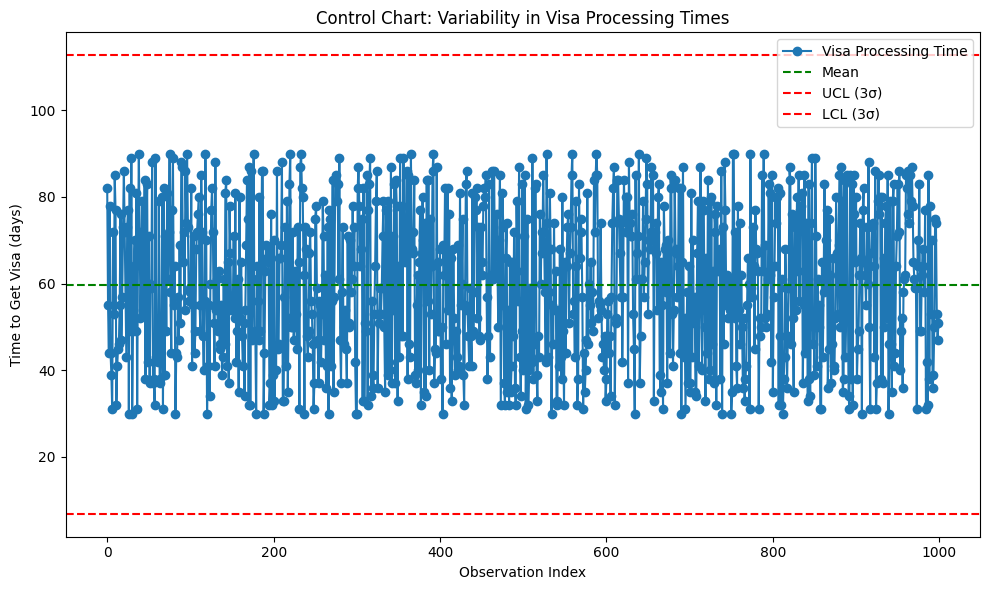

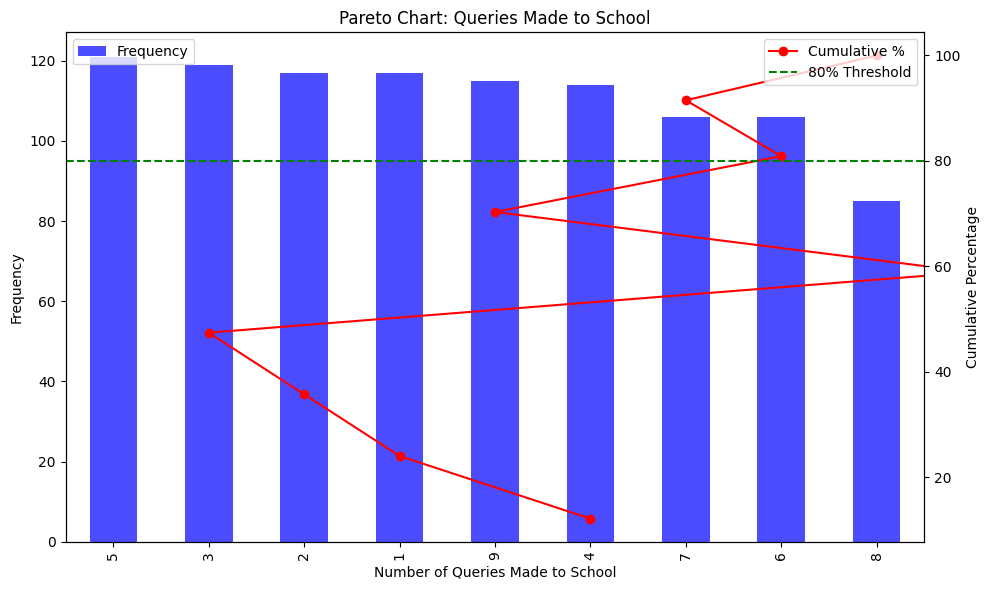

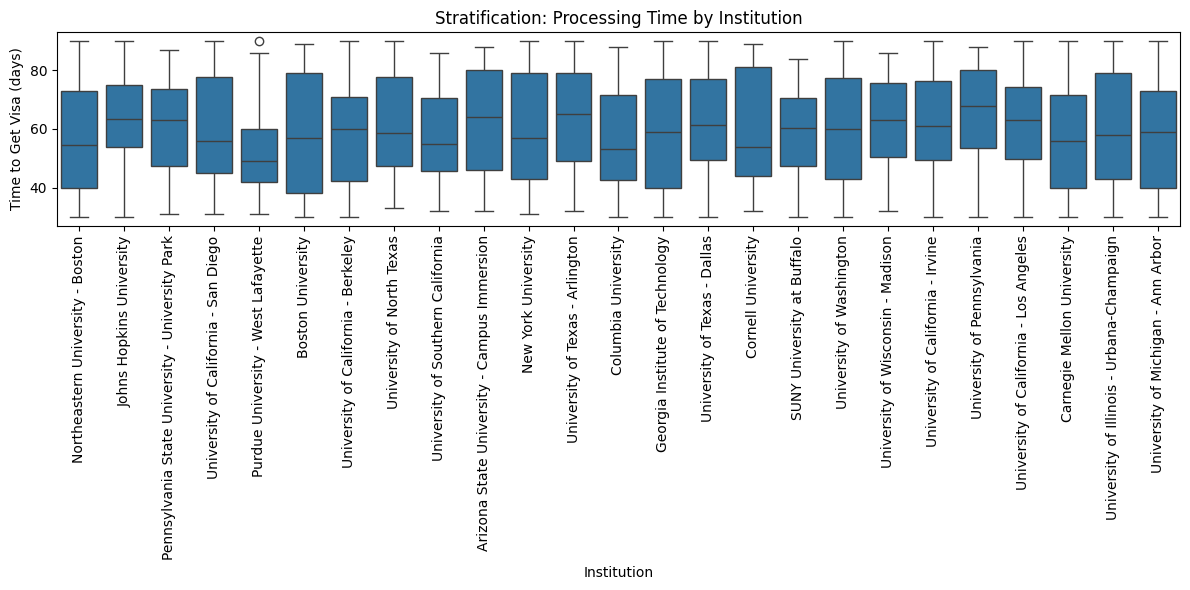

(0.5667670802915815, 17.643932309645358)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reload and process the dataset for Measure Phase analysis
data = pd.read_csv('international_student_onboarding.csv')

# Ensure numeric conversions for relevant fields
data['Time to Receive Acceptance (days)'] = pd.to_numeric(data['Time to Receive Acceptance (days)'], errors='coerce')
data['Time to Get Visa (days)'] = pd.to_numeric(data['Time to Get Visa (days)'], errors='coerce')
data['Number of Queries Made to School'] = pd.to_numeric(data['Number of Queries Made to School'], errors='coerce')

# CONTROL CHART: Variability in Visa Processing Times
visa_times = data['Time to Get Visa (days)'].dropna()
mean_time = visa_times.mean()
std_time = visa_times.std()
upper_control_limit = mean_time + 3 * std_time
lower_control_limit = mean_time - 3 * std_time

plt.figure(figsize=(10, 6))
plt.plot(visa_times, marker='o', linestyle='-', label='Visa Processing Time')
plt.axhline(mean_time, color='green', linestyle='--', label='Mean')
plt.axhline(upper_control_limit, color='red', linestyle='--', label='UCL (3σ)')
plt.axhline(lower_control_limit, color='red', linestyle='--', label='LCL (3σ)')
plt.title('Control Chart: Variability in Visa Processing Times')
plt.xlabel('Observation Index')
plt.ylabel('Time to Get Visa (days)')
plt.legend()
plt.tight_layout()
plt.show()

# PARETO CHART: Frequency of Queries Made to School
queries_frequency = data['Number of Queries Made to School'].value_counts().sort_values(ascending=False)
cumulative_percentage = (queries_frequency.cumsum() / queries_frequency.sum()) * 100

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
queries_frequency.plot(kind='bar', ax=ax1, color='blue', alpha=0.7, label='Frequency')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Number of Queries Made to School')
ax1.set_title('Pareto Chart: Queries Made to School')
ax2.plot(cumulative_percentage.index, cumulative_percentage, color='red', marker='o', label='Cumulative %')
ax2.axhline(80, color='green', linestyle='--', label='80% Threshold')
ax2.set_ylabel('Cumulative Percentage')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# STRATIFICATION: Processing Time by Institution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Institution', y='Time to Get Visa (days)', data=data)
plt.xticks(rotation=90)
plt.title('Stratification: Processing Time by Institution')
plt.xlabel('Institution')
plt.ylabel('Time to Get Visa (days)')
plt.tight_layout()
plt.show()

# PROCESS CAPABILITY: Sigma and Cp
usl = 100  # Example Upper Specification Limit (customizable based on process goals)
lsl = 40   # Example Lower Specification Limit
cp = (usl - lsl) / (6 * std_time)  # Process Capability Index

cp, std_time


Data loaded successfully
Shape of dataset: (1000, 24)


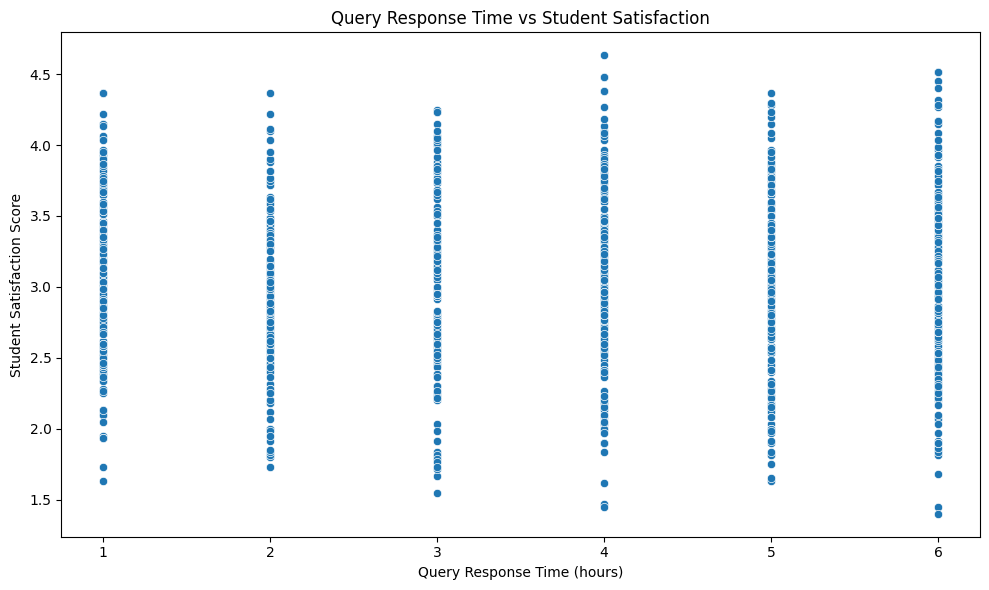

Correlation between Query Response Time and Satisfaction: -0.015


In [17]:
# First load the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('international_student_onboarding.csv')

# Calculate total process time
process_columns = [
    "Time to Receive Acceptance (days)",
    "Time to Accept (days)",
    "Time to Submit I-20 Docs (days)",
    "Time to Issue I-20 (days)",
    "Time to Get Visa (days)"
]
data['Total Process Time (days)'] = data[process_columns].sum(axis=1)
fig.show()
print("Data loaded successfully")
print("\
Shape of dataset:", data.shape)
fig.show()

# Investigate correlation between query response times and satisfaction
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=data, x='Time Taken to Respond to Queries (days))', y='Student Satisfaction Score')
# Correct the column name for 'x'
sns.scatterplot(data=data, x='Time Taken to Respond to Queries (days)', y='Student Satisfaction Score')
plt.title('Query Response Time vs Student Satisfaction')
plt.xlabel('Query Response Time (hours)')
plt.ylabel('Student Satisfaction Score')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = data['Time Taken to Respond to Queries (days)'].corr(data['Student Satisfaction Score'])
print("\
Correlation between Query Response Time and Satisfaction:", round(correlation, 3))

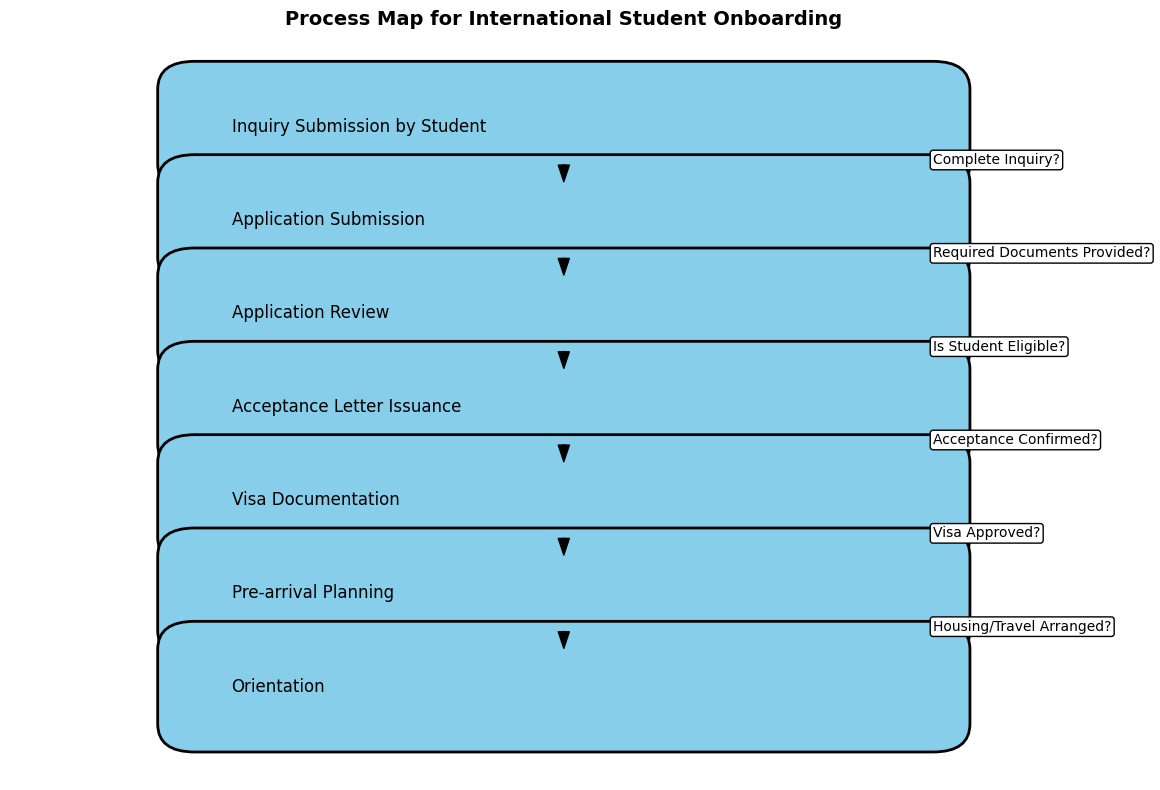

In [18]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Create a process map figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define the steps and positions
steps = [
    "Inquiry Submission by Student",
    "Application Submission",
    "Application Review",
    "Acceptance Letter Issuance",
    "Visa Documentation",
    "Pre-arrival Planning",
    "Orientation"
]

positions = [
    (0.5, 7),  # Step 1
    (0.5, 6),  # Step 2
    (0.5, 5),  # Step 3
    (0.5, 4),  # Step 4
    (0.5, 3),  # Step 5
    (0.5, 2),  # Step 6
    (0.5, 1)   # Step 7
]

# Plot the steps with rectangles and add text
for i, (step, pos) in enumerate(zip(steps, positions)):
    rect = mpatches.FancyBboxPatch(
        (pos[0], pos[1]-0.4),  # Bottom-left corner of the rectangle
        6, 0.8,                # Width, height
        boxstyle="round,pad=0.3",
        edgecolor="black",
        facecolor="skyblue",
        linewidth=2
    )
    ax.add_patch(rect)
    ax.text(pos[0] + 0.3, pos[1], step, fontsize=12, verticalalignment='center')

# Add decision points
decision_points = [
    (6.5, 6.6, "Complete Inquiry?"),  # Step 1 decision
    (6.5, 5.6, "Required Documents Provided?"),  # Step 2 decision
    (6.5, 4.6, "Is Student Eligible?"),  # Step 3 decision
    (6.5, 3.6, "Acceptance Confirmed?"),  # Step 4 decision
    (6.5, 2.6, "Visa Approved?"),  # Step 5 decision
    (6.5, 1.6, "Housing/Travel Arranged?")  # Step 6 decision
]

for (x, y, label) in decision_points:
    ax.text(x, y, label, fontsize=10, bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.2"))

# Arrows to show flow
for i in range(len(positions) - 1):
    start_pos = positions[i]
    end_pos = positions[i+1]
    ax.annotate("", xy=(end_pos[0] + 3, end_pos[1] + 0.4), xytext=(start_pos[0] + 3, start_pos[1] - 0.4),
                arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1.5, headwidth=8))

# Set plot limits and remove axes
ax.set_xlim(-1, 8)
ax.set_ylim(0, 8)
ax.axis("off")

plt.title("Process Map for International Student Onboarding", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<ipython-input-19-f1bd5a74a65f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country of Origin', y='Total Process Time (days)', palette='Set3')


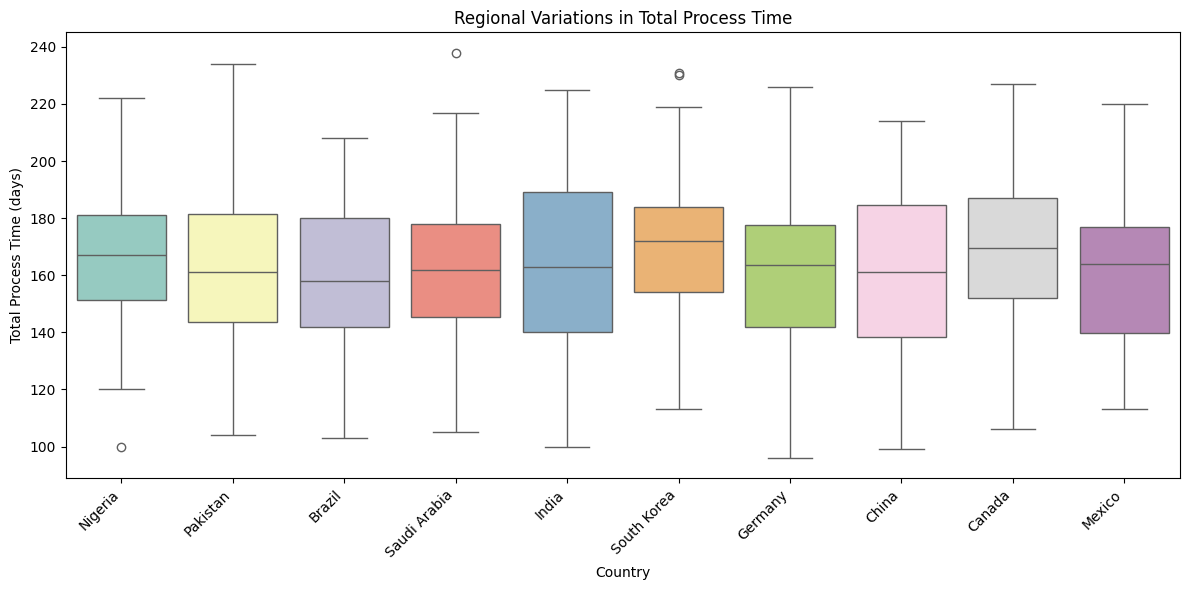

Average Processing Time by Country:
Country of Origin
South Korea     170.43
Canada          169.50
Nigeria         166.06
India           163.79
Saudi Arabia    163.03
Name: Total Process Time (days), dtype: float64
Available columns in the dataset:
['First Name', 'Last Name', 'Country of Origin', 'Institution', 'City', 'State', 'Application Submitted Date', 'Time to Receive Acceptance (days)', 'Acceptance Received Date', 'Time to Accept (days)', 'Acceptance Accepted Date', 'Time to Submit I-20 Docs (days)', 'I-20 Submitted Date', 'Time to Issue I-20 (days)', 'I-20 Issued Date', 'Visa Type', 'Visa Request Submitted Date', 'Visa Decision Date', 'Time to Get Visa (days)', 'Number of Queries Made to School', 'Process Complexity Score', 'Student Satisfaction Score', 'Time Taken to Respond to Queries (days)', 'Total Process Time (days)']


<ipython-input-19-f1bd5a74a65f>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country of Origin', y='Total Process Time (days)', palette='Set3')


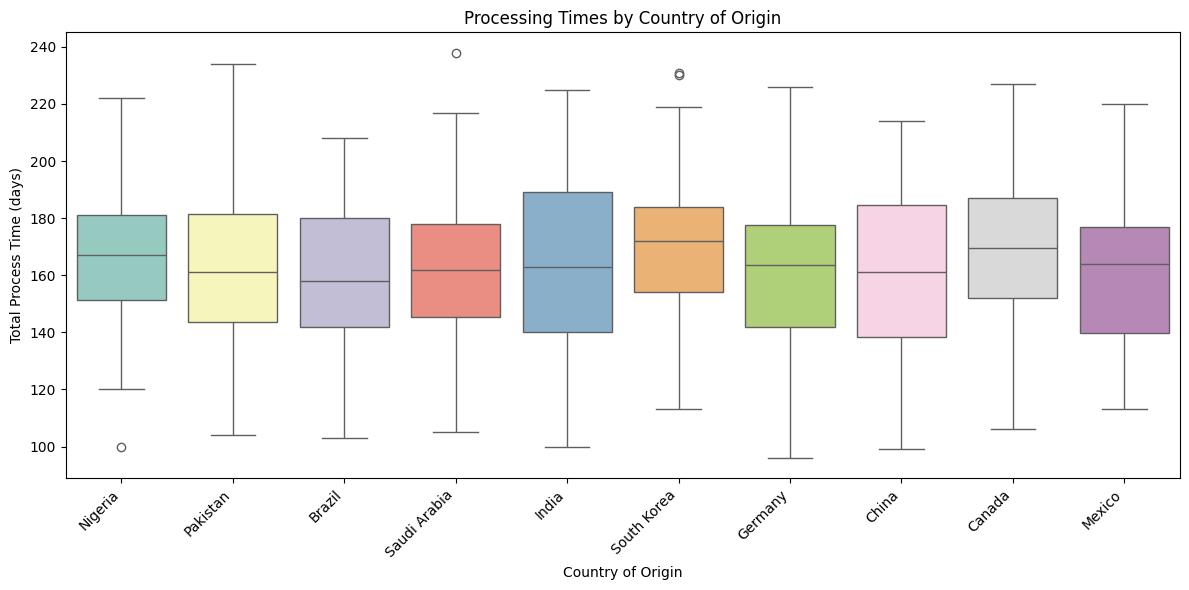

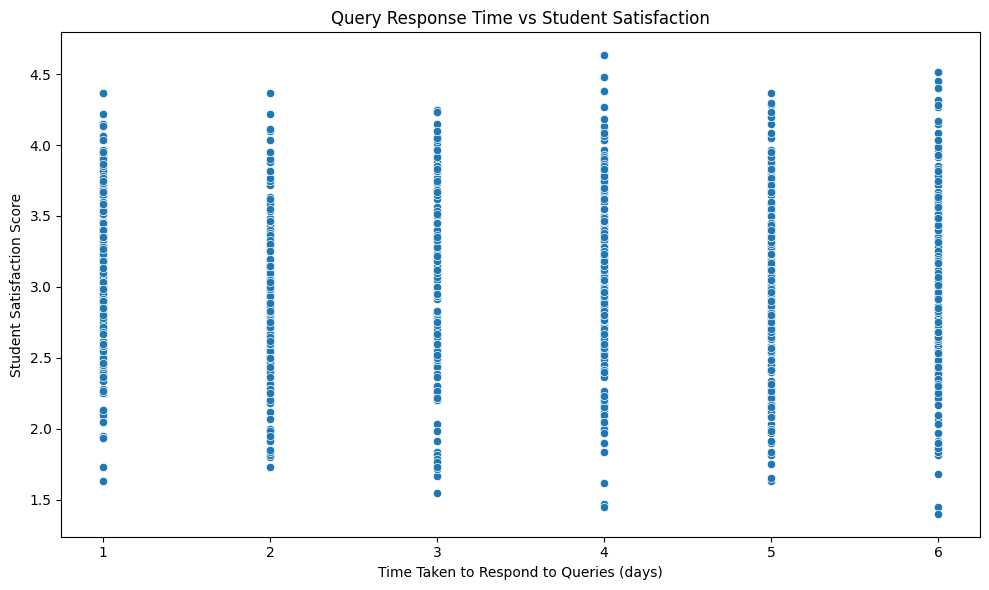

Correlation between Query Response Time and Satisfaction: -0.015


In [19]:
# First load the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('international_student_onboarding.csv')

# Calculate total process time
process_columns = [
    "Time to Receive Acceptance (days)",
    "Time to Accept (days)",
    "Time to Submit I-20 Docs (days)",
    "Time to Issue I-20 (days)",
    "Time to Get Visa (days)"
]
data['Total Process Time (days)'] = data[process_columns].sum(axis=1)

# Now create the regional variation plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Country of Origin', y='Total Process Time (days)', palette='Set3')
plt.title('Regional Variations in Total Process Time')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Process Time (days)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

# Calculate average processing time by country
regional_metrics = data.groupby('Country of Origin')['Total Process Time (days)'].mean().sort_values(ascending=False).round(2)

print("\
Average Processing Time by Country:")
print(regional_metrics.head())

# Let's first check the actual columns in our dataset
print("Available columns in the dataset:")
print(data.columns.tolist())

# Analyze regional variations using Country of Origin
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Country of Origin', y='Total Process Time (days)', palette='Set3')
plt.title('Processing Times by Country of Origin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation analysis between query response times and satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time Taken to Respond to Queries (days)', y='Student Satisfaction Score')
plt.title('Query Response Time vs Student Satisfaction')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = data['Time Taken to Respond to Queries (days)'].corr(data['Student Satisfaction Score'])
print("\
Correlation between Query Response Time and Satisfaction:", round(correlation, 3))

<ipython-input-20-9c8a1398b3d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='State', y='Total Process Time (days)', palette='Set3')


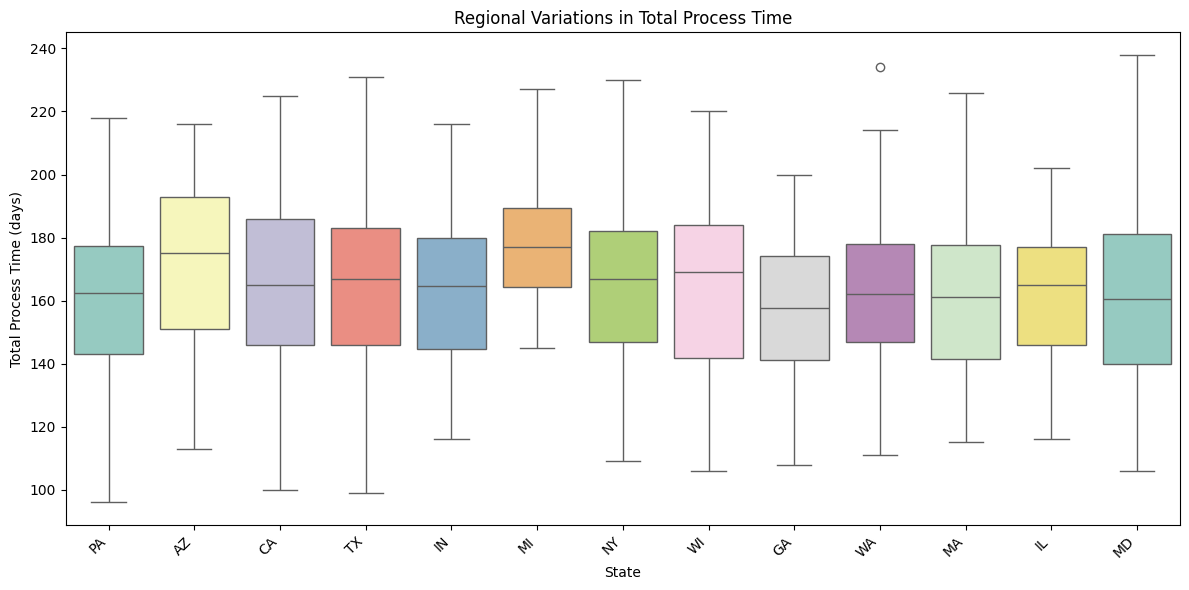

Average Total Process Time by State:
State
MI    178.61
AZ    172.17
NY    166.12
WI    164.63
CA    164.62
TX    163.78
WA    163.78
IN    163.48
MA    161.94
MD    161.74
PA    160.05
IL    159.21
GA    155.91
Name: Total Process Time (days), dtype: float64
Dataset reloaded and variables redefined.


In [20]:
# Analyze regional variations in processing times
plt.figure(figsize=(12, 6))

# Box plot comparing total process time by state
sns.boxplot(data=data, x='State', y='Total Process Time (days)', palette='Set3')
plt.title('Regional Variations in Total Process Time')
plt.xlabel('State')
plt.ylabel('Total Process Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate average process time by state
regional_metrics = data.groupby('State')['Total Process Time (days)'].mean().sort_values(ascending=False).round(2)

print("\
Average Total Process Time by State:")
print(regional_metrics)

# Reload the dataset and redefine necessary variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('international_student_onboarding.csv')

# Redefine key columns for analysis
key_columns = [
    "Time to Receive Acceptance (days)",
    "Time to Accept (days)",
    "Time to Submit I-20 Docs (days)",
    "Time to Issue I-20 (days)",
    "Time to Get Visa (days)"
]

# Recalculate total process time
data['Total Process Time (days)'] = data[key_columns].sum(axis=1)

print("Dataset reloaded and variables redefined.")


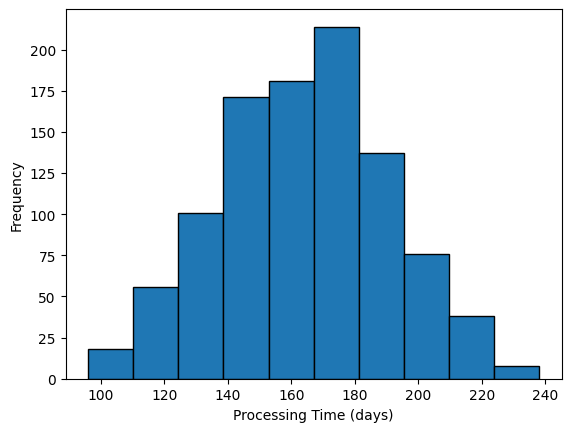

NameError: name 'df' is not defined

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your dataset here, assuming it's in a CSV file named 'international_student_onboarding.csv'
# and the processing times are in a column named 'Total Process Time (days)'
data = pd.read_csv('international_student_onboarding.csv')


# Calculate total process time
process_columns = [
    "Time to Receive Acceptance (days)",
    "Time to Accept (days)",
    "Time to Submit I-20 Docs (days)",
    "Time to Issue I-20 (days)",
    "Time to Get Visa (days)"
]
data['Total Process Time (days)'] = data[process_columns].sum(axis=1)

# Now create the regional variation plot

# Extract the processing times from the DataFrame
processing_times = data['Total Process Time (days)']

# Now you can create the histogram
plt.hist(processing_times, bins=10, edgecolor='black')
plt.xlabel('Processing Time (days)')
plt.ylabel('Frequency')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'processing_times' is a list of processing times, grouped by department
sns.boxplot(x='Country of Origin', y='Time to Issue I-20 (days)', data=df)
plt.xlabel('Country')
plt.ylabel('Processing Time [I-20] (days)')
plt.title('Box Plot of Processing Times by Countries')
plt.show()

# Assuming 'processing_times' is a list of processing times, grouped by department
sns.boxplot(x='Country of Origin', y='Time to Get Visa (days)', data=df)
plt.xlabel('Country')
plt.ylabel('Processing Time [Visa] (days)')
plt.title('Box Plot of Processing Times by Countries')
plt.show()

# Assuming 'processing_times' is a list of processing times, grouped by department
sns.boxplot(x='Country of Origin', y='Number of Queries Made to School', data=df)
plt.xlabel('Country')
plt.ylabel('Number of [Queries]')
plt.title('Box Plot of Queries Made by Countries')
plt.show()

In [30]:
import graphviz

def create_value_stream_map():
    dot = graphviz.Digraph(comment='International Student Onboarding')

    # Nodes representing process steps
    dot.node('Application Submission', shape='box')
    dot.node('Application Review', shape='box')
    dot.node('Visa Processing', shape='box', style='filled', fillcolor='lightgray')  # Non-value-added
    dot.node('Housing Assignment', shape='box')
    dot.node('Course Registration', shape='box')
    dot.node('Orientation', shape='box')

    # Edges representing the flow of the process
    dot.edge('Application Submission', 'Application Review')
    dot.edge('Application Review', 'Visa Processing')
    dot.edge('Visa Processing', 'Housing Assignment')
    dot.edge('Housing Assignment', 'Course Registration')
    dot.edge('Course Registration', 'Orientation')

    # Visualizing the graph
    dot.render('value_stream_map.png', view=True)

if __name__ == '__main__':
    create_value_stream_map()

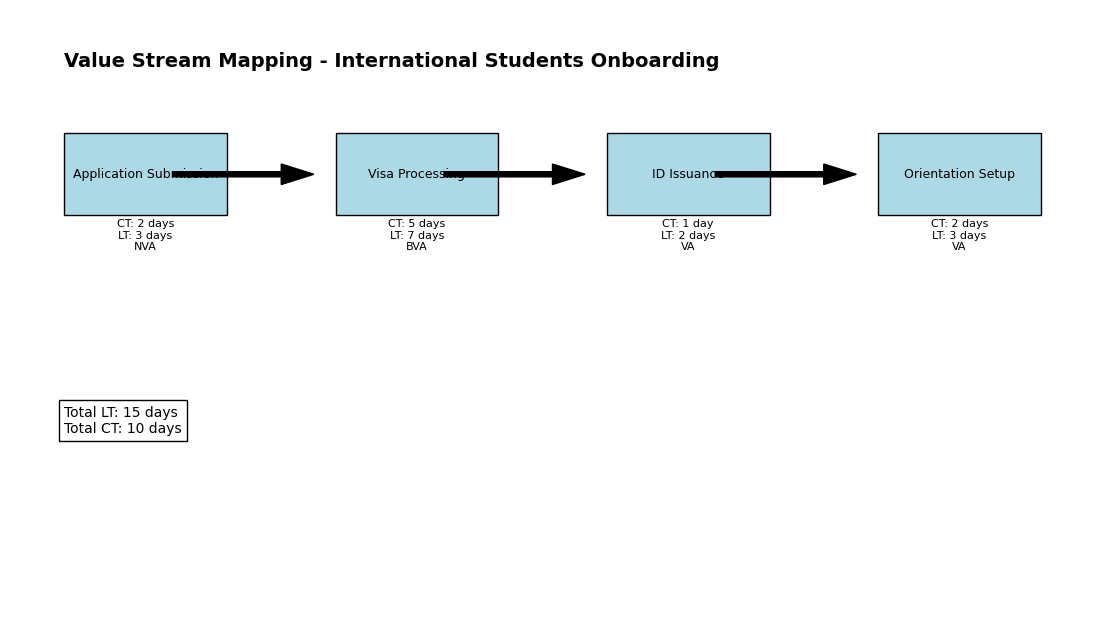

'International_Student_Onboarding_VSM.png'

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow, Rectangle

# Create a figure for the VSM
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")

# Process step coordinates and descriptions
process_steps = [
    {"name": "Application Submission", "x": 0.5, "y": 4, "ct": "2 days", "lt": "3 days", "type": "NVA"},
    {"name": "Visa Processing", "x": 3, "y": 4, "ct": "5 days", "lt": "7 days", "type": "BVA"},
    {"name": "ID Issuance", "x": 5.5, "y": 4, "ct": "1 day", "lt": "2 days", "type": "VA"},
    {"name": "Orientation Setup", "x": 8, "y": 4, "ct": "2 days", "lt": "3 days", "type": "VA"},
]

# Draw process steps
for step in process_steps:
    # Box for each step
    rect = Rectangle((step["x"], step["y"]), 1.5, 0.8, edgecolor="black", facecolor="lightblue")
    ax.add_patch(rect)
    # Text inside the box
    ax.text(step["x"] + 0.75, step["y"] + 0.4, step["name"], ha="center", va="center", fontsize=9)
    ax.text(step["x"] + 0.75, step["y"] - 0.2, f"CT: {step['ct']}\nLT: {step['lt']}\n{step['type']}",
            ha="center", va="center", fontsize=8, color="black")

# Draw arrows between steps
arrow_positions = [(1.5, 4.4, 2.8, 4.4), (4, 4.4, 5.3, 4.4), (6.5, 4.4, 7.8, 4.4)]
for x1, y1, x2, y2 in arrow_positions:
    ax.add_patch(FancyArrow(x1, y1, x2 - x1, y2 - y1, width=0.05, head_width=0.2, head_length=0.3, length_includes_head=True, color="black"))

# Add timeline metrics at the bottom
ax.text(0.5, 2, "Total LT: 15 days\nTotal CT: 10 days", fontsize=10, ha="left", va="center", bbox=dict(facecolor="white", edgecolor="black"))

# Add headers for VA, NVA, BVA classifications
ax.text(0.5, 5.5, "Value Stream Mapping - International Students Onboarding", fontsize=14, ha="left", va="center", weight="bold")

# Save and show the diagram
vsm_path = "International_Student_Onboarding_VSM.png"
plt.savefig(vsm_path, bbox_inches="tight")
plt.show()

vsm_path

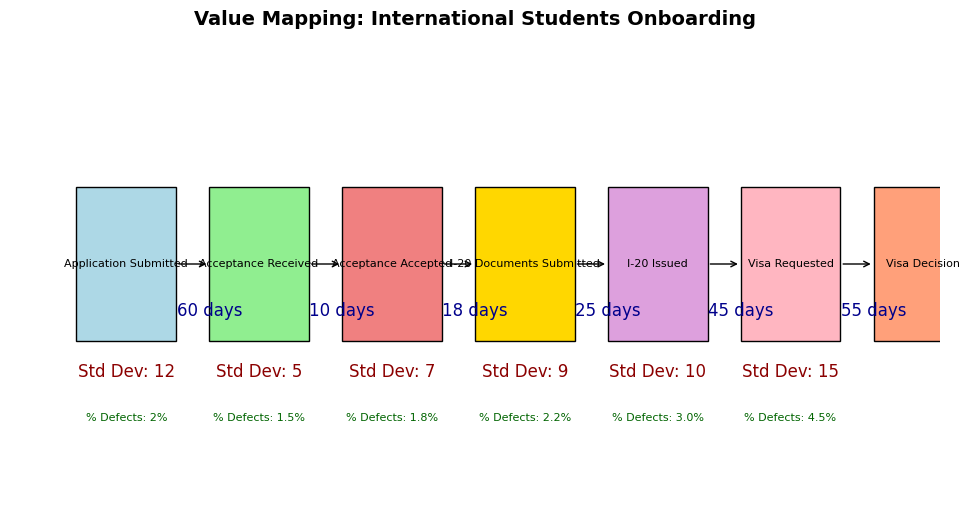

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the stages of the process and corresponding times based on the reference data
stages = [
    "Application Submitted",
    "Acceptance Received",
    "Acceptance Accepted",
    "I-20 Documents Submitted",
    "I-20 Issued",
    "Visa Requested",
    "Visa Decision"
]

# Average times (in days) between stages based on the dataset provided
times_between_stages = [60, 10, 18, 25, 45, 55]  # Derived from reference data

# Standard Deviation and % Defects
std_devs = [12, 5, 7, 9, 10, 15]  # Example standard deviations for each stage
percent_defects = [2, 1.5, 1.8, 2.2, 3.0, 4.5]  # Example % defects for each stage

# Colors to denote stages in the process
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'plum', 'lightpink', 'lightsalmon']

# Create the process flow diagram
fig, ax = plt.subplots(figsize=(12, 6))

# Draw rectangles for each stage
for i, (stage, color) in enumerate(zip(stages, colors)):
    ax.add_patch(mpatches.Rectangle((i * 2, 4), 1.5, 1, color=color, ec="black"))
    ax.text(i * 2 + 0.75, 4.5, stage, ha='center', va='center', fontsize=8, wrap=True)

# Draw arrows between stages (forward direction from left to right)
for i in range(len(stages) - 1):
    ax.annotate("", xy=((i + 1) * 2, 4.5), xytext=(i * 2 + 1.5, 4.5),
                arrowprops=dict(arrowstyle="->", color='black'))  # Forward arrow

# Add timing details below each arrow
for i, time in enumerate(times_between_stages):
    ax.text(i * 2 + 2, 4.2, f"{time} days", ha='center', va='center', fontsize=12, color="darkblue")

# Add standard deviation and % defects below each stage
for i, (std, defect) in enumerate(zip(std_devs, percent_defects)):
    ax.text(i * 2 + 0.75, 3.8, f"Std Dev: {std}", ha='center', va='center', fontsize=12, color="darkred")
    ax.text(i * 2 + 0.75, 3.5, f"% Defects: {defect}%", ha='center', va='center', fontsize=8, color="darkgreen")

# Set limits and labels
ax.set_xlim(-1, len(stages) * 2 - 1)
ax.set_ylim(3, 6)
ax.axis('off')

# Show diagram
plt.title("Value Mapping: International Students Onboarding", fontsize=14, weight='bold')
plt.show()

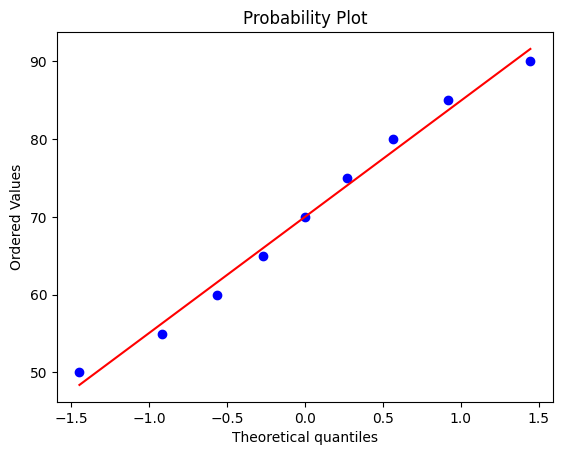

Shapiro-Wilk Test Statistic: 0.9722884258803877, p-value: 0.913560953190048


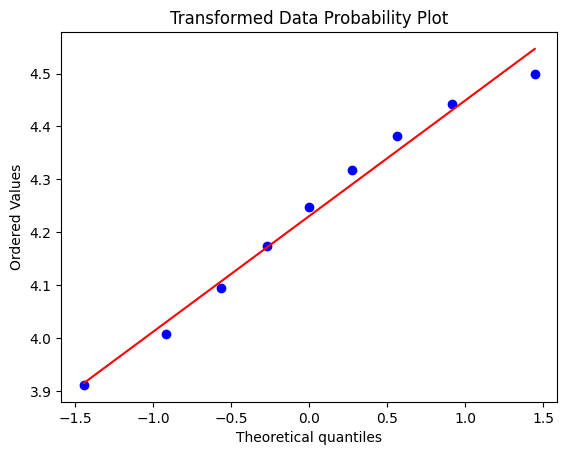

In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example dataset
data = [50, 55, 60, 65, 70, 75, 80, 85, 90]

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Probability Plot")
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(data)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# Log Transformation if non-normal
transformed_data = np.log(data)
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title("Transformed Data Probability Plot")
plt.show()


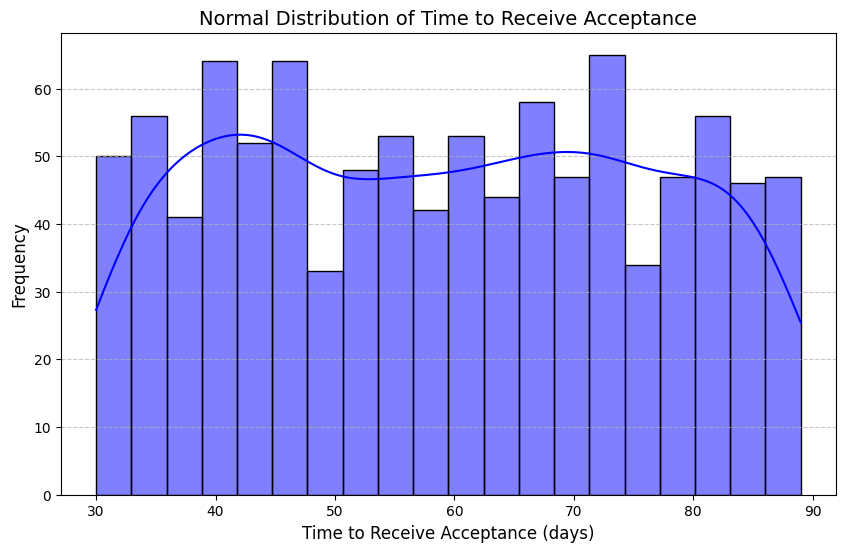

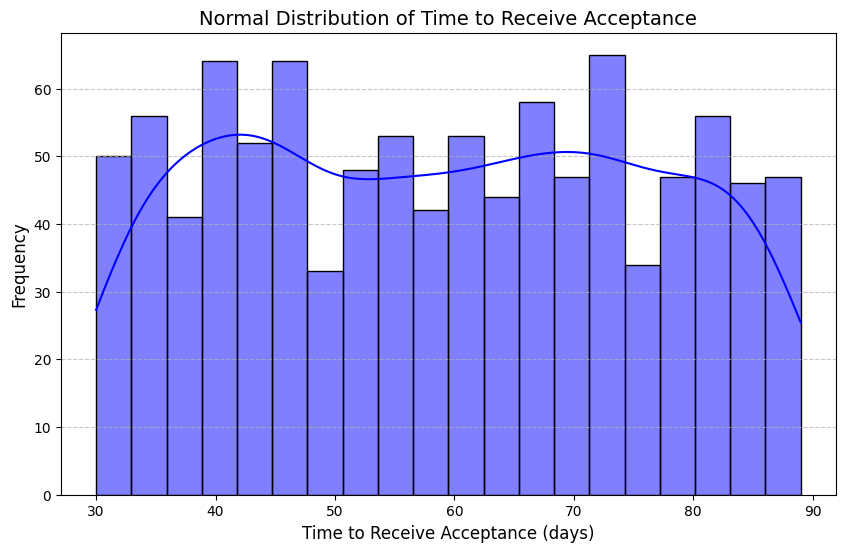

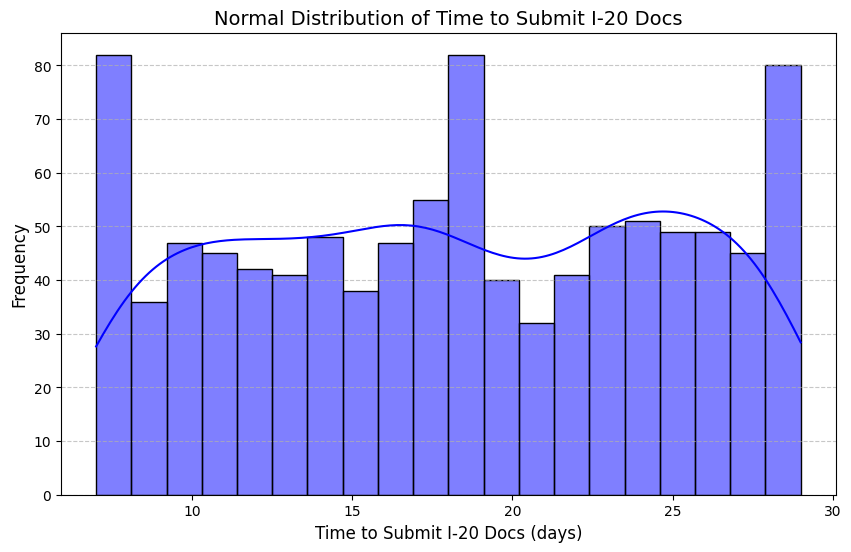

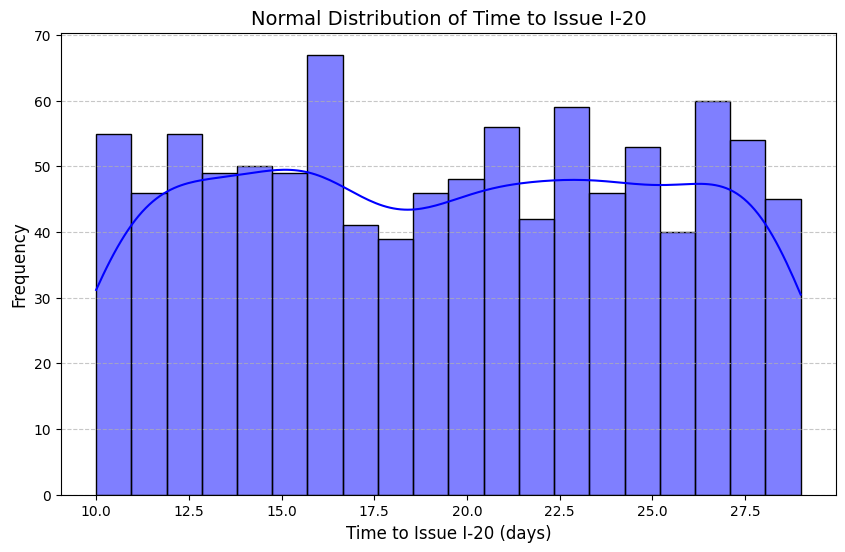

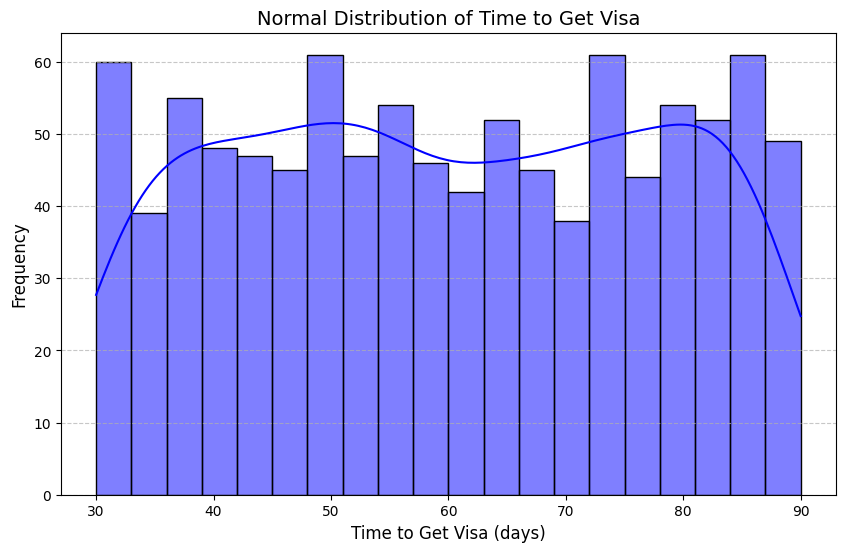

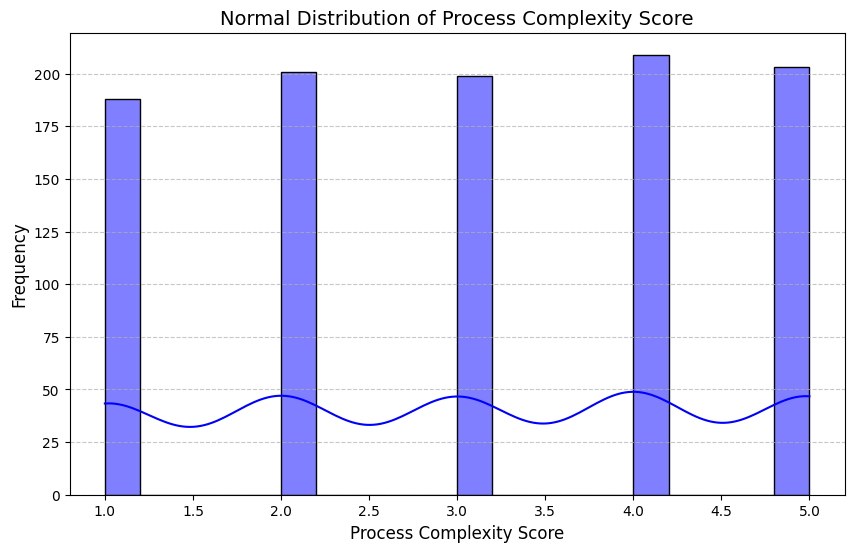

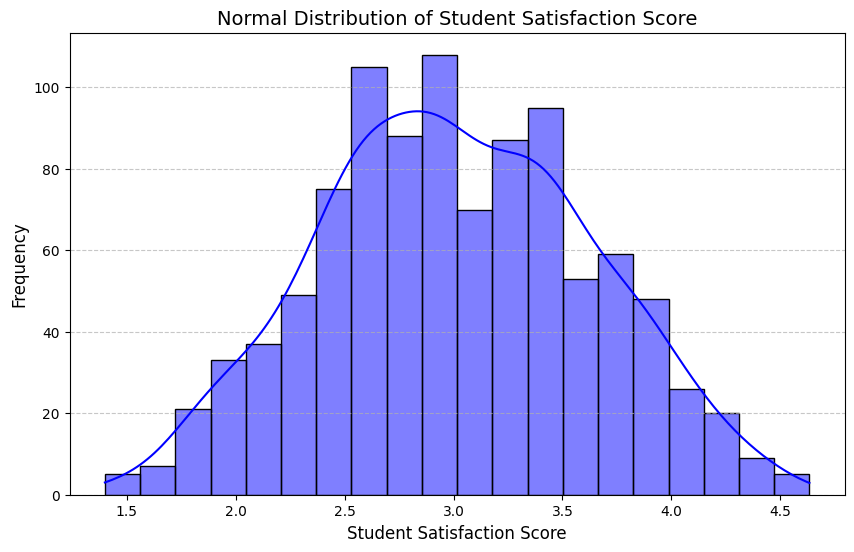

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("international_student_onboarding.csv")

# Plot normal distribution for specific columns
plot_normal_distribution(df, 'Time to Receive Acceptance (days)',
                         'Normal Distribution of Time to Receive Acceptance',
                         'Time to Receive Acceptance (days)')

# Define a function to create a normal distribution graph for the given column
def plot_normal_distribution(data, column_name, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], kde=True, color='blue', bins=20)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot normal distribution for specific columns
plot_normal_distribution(df, 'Time to Receive Acceptance (days)',
                         'Normal Distribution of Time to Receive Acceptance',
                         'Time to Receive Acceptance (days)')

plot_normal_distribution(df, 'Time to Submit I-20 Docs (days)',
                         'Normal Distribution of Time to Submit I-20 Docs',
                         'Time to Submit I-20 Docs (days)')

plot_normal_distribution(df, 'Time to Issue I-20 (days)',
                         'Normal Distribution of Time to Issue I-20',
                         'Time to Issue I-20 (days)')

plot_normal_distribution(df, 'Time to Get Visa (days)',
                         'Normal Distribution of Time to Get Visa',
                         'Time to Get Visa (days)')

plot_normal_distribution(df, 'Process Complexity Score',
                         'Normal Distribution of Process Complexity Score',
                         'Process Complexity Score')

plot_normal_distribution(df, 'Student Satisfaction Score',
                         'Normal Distribution of Student Satisfaction Score',
                         'Student Satisfaction Score')

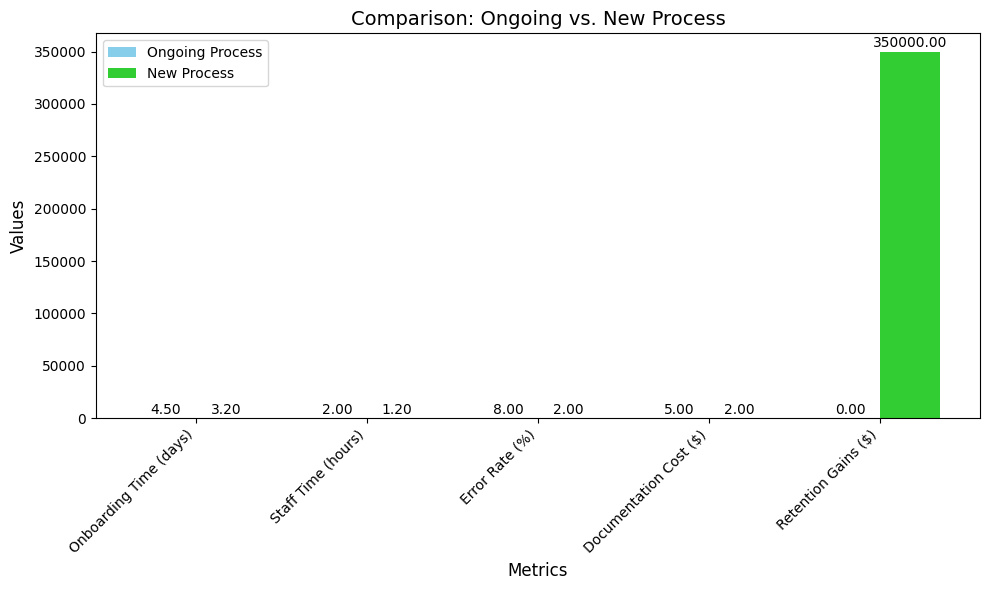

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data for ongoing vs. new process
metrics = ["Onboarding Time (days)", "Staff Time (hours)", "Error Rate (%)", "Documentation Cost ($)", "Retention Gains ($)"]
ongoing = [4.5, 2, 8, 5, 0]
new = [3.2, 1.2, 2, 2, 350000]

# Plotting the bar chart
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, ongoing, width, label='Ongoing Process', color='skyblue')
bars2 = ax.bar(x + width/2, new, width, label='New Process', color='limegreen')

# Adding labels and title
ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Values", fontsize=12)
ax.set_title("Comparison: Ongoing vs. New Process", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha="right", fontsize=10)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

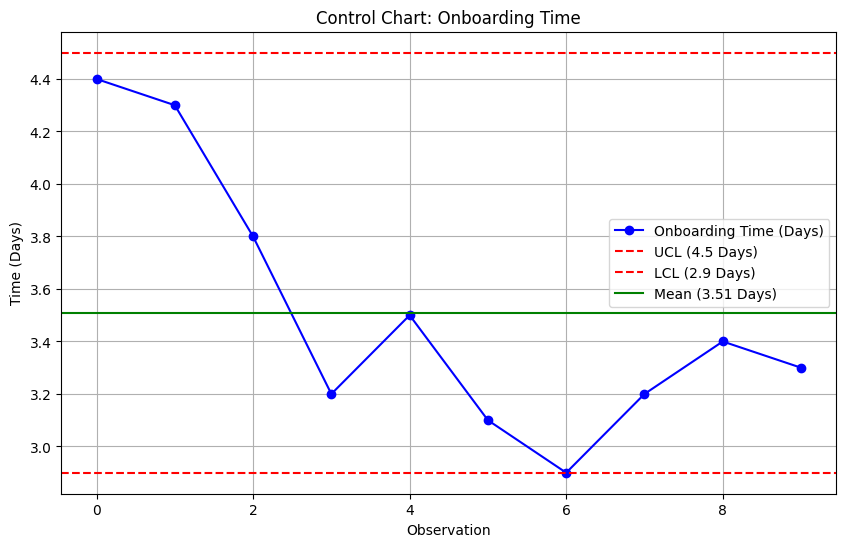

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for Control Chart
time_taken = [4.4, 4.3, 3.8, 3.2, 3.5, 3.1, 2.9, 3.2, 3.4, 3.3]
UCL = 4.5
LCL = 2.9
mean_time = np.mean(time_taken)

# Plotting the Control Chart
plt.figure(figsize=(10, 6))
plt.plot(time_taken, marker='o', label='Onboarding Time (Days)', color='blue')
plt.axhline(y=UCL, color='red', linestyle='--', label='UCL (4.5 Days)')
plt.axhline(y=LCL, color='red', linestyle='--', label='LCL (2.9 Days)')
plt.axhline(y=mean_time, color='green', linestyle='-', label=f'Mean ({mean_time:.2f} Days)')
plt.title('Control Chart: Onboarding Time')
plt.xlabel('Observation')
plt.ylabel('Time (Days)')
plt.legend()
plt.grid()
plt.show()

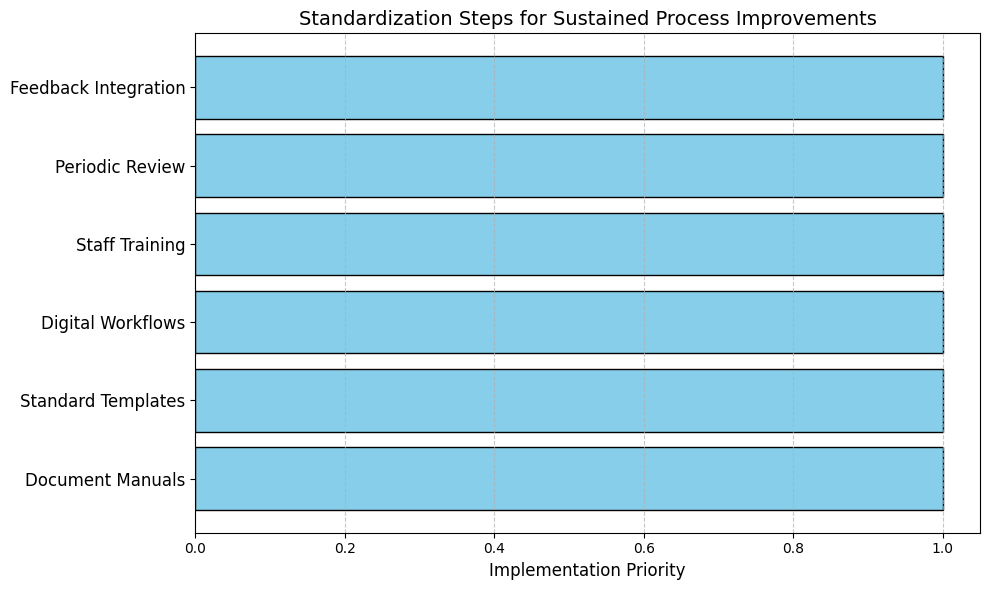

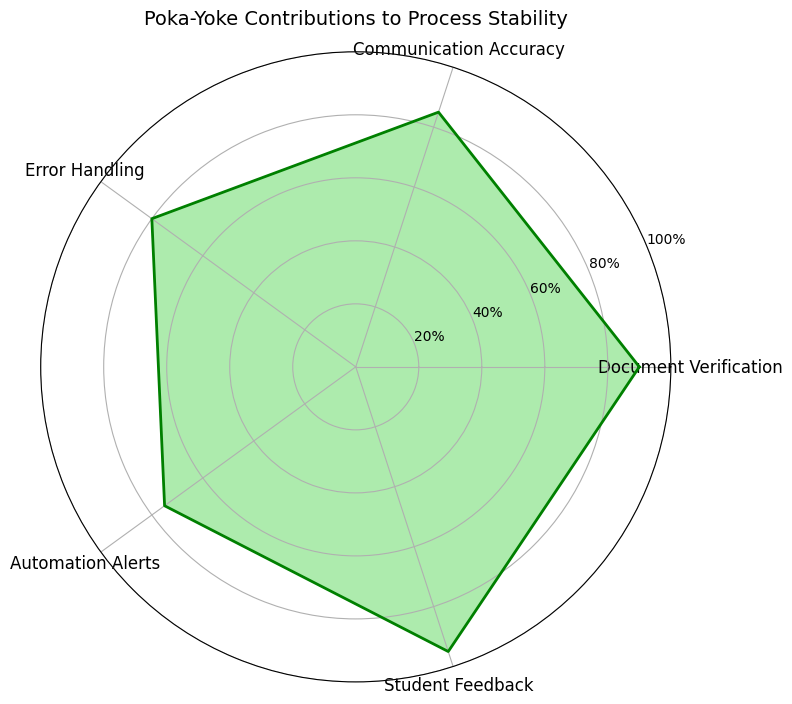

In [28]:
import matplotlib.pyplot as plt

# Visualization 1: Standardization Process Flow
plt.figure(figsize=(10, 6))
flow_steps = [
    "Document Manuals", "Standard Templates", "Digital Workflows",
    "Staff Training", "Periodic Review", "Feedback Integration"
]
positions = range(len(flow_steps))

plt.barh(positions, [1]*len(flow_steps), color='skyblue', edgecolor='black')
plt.yticks(positions, flow_steps, fontsize=12)
plt.title("Standardization Steps for Sustained Process Improvements", fontsize=14)
plt.xlabel("Implementation Priority", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Poka-Yoke Contribution Radar Chart
import numpy as np

# Categories for poka-yoke implementation
categories = [
    "Document Verification",
    "Communication Accuracy",
    "Error Handling",
    "Automation Alerts",
    "Student Feedback"
]

# Example contribution values for poka-yoke effectiveness
values = [90, 85, 80, 75, 95]
values += values[:1]  # To close the radar chart

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Radar chart setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='limegreen', alpha=0.4)
ax.plot(angles, values, color='green', linewidth=2)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
plt.title("Poka-Yoke Contributions to Process Stability", fontsize=14, pad=20)
plt.tight_layout()
plt.show()